<a href="https://colab.research.google.com/github/jtndr26/Bank_Loan_Applications/blob/main/Bank_Loan_Application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis
## Contributor: Individual
## Team member: Jeetendra Sarpe.

### Github link:
https://github.com/jtndr26/Bank_Loan_Applications/blob/main/Banking_Loan_Application_EDA.ipynb


#### Problem Statement:
-  Use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.
-  Present the overall approach of the analysis in a presentation. Mention the problem statement and the analysis approach briefly.
-  Identify the missing data and use appropriate method to deal with it.
-  Explain the results of univariate, segmented univariate, bivariate analysis, etc. in business terms.
-  Find the top 10 correlation for the Client with payment difficulties and all other cases (Target variable).
-  Include visualisations and summarise the most important results in the presentation. Insights should explain why the variable is important for differentiating the clients with payment difficulties with all other cases.

In [1]:
# Filtering the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_column',None)


In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
#Loading Application Dataset to pandas variable
path = '/content/drive/My Drive/Feynn_Labs/Bank Loan/'
cl_data = pd.read_csv(path+'application_data.csv')

In [5]:
cl_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
cl_data.shape

(307511, 122)

In [7]:
cl_data.info(verbose = True,null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [8]:
null_data = cl_data.isnull().sum()/len(cl_data)*100

In [9]:
null_data.head(100)

SK_ID_CURR                0.000000
TARGET                    0.000000
NAME_CONTRACT_TYPE        0.000000
CODE_GENDER               0.000000
FLAG_OWN_CAR              0.000000
                            ...   
DAYS_LAST_PHONE_CHANGE    0.000325
FLAG_DOCUMENT_2           0.000000
FLAG_DOCUMENT_3           0.000000
FLAG_DOCUMENT_4           0.000000
FLAG_DOCUMENT_5           0.000000
Length: 100, dtype: float64

In [10]:
# Dropping the Columns with more than 40% null values
cl_data.loc[:,'APARTMENTS_AVG':'EMERGENCYSTATE_MODE']

,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No
1,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.2021,0.0887,0.9876,0.8300,0.0202,0.22,0.1034,0.6042,0.2708,0.0594,0.1484,0.1965,0.0753,0.1095,0.1008,0.0172,0.9782,0.7125,0.0172,0.0806,0.0345,0.4583,0.0417,0.0094,0.0882,0.0853,0.0,0.0125,0.2040,0.0887,0.9876,0.8323,0.0203,0.22,0.1034,0.6042,0.2708,0.0605,0.1509,0.2001,0.0757,0.1118,reg oper account,block of flats,0.2898,"Stone, brick",No
307507,0.0247,0.0435,0.9727,0.6260,0.0022,0.00,0.1034,0.0833,0.1250,0.0579,0.0202,0.0257,0.0000,0.0000,0.0252,0.0451,0.9727,0.6406,0.0022,0.0000,0.1034,0.0833,0.1250,0.0592,0.0220,0.0267,0.0,0.0000,0.0250,0.0435,0.9727,0.6310,0.0022,0.00,0.1034,0.0833,0.1250,0.0589,0.0205,0.0261,0.0000,0.0000,reg oper account,block of flats,0.0214,"Stone, brick",No
307508,0.1031,0.0862,0.9816,0.7484,0.0123,0.00,0.2069,0.1667,0.2083,NaN,0.0841,0.9279,0.0000,0.0000,0.1050,0.0894,0.9816,0.7583,0.0124,0.0000,0.2069,0.1667,0.2083,NaN,0.0918,0.9667,0.0,0.0000,0.1041,0.0862,0.9816,0.7518,0.0124,0.00,0.2069,0.1667,0.2083,NaN,0.0855,0.9445,0.0000,0.0000,reg oper account,block of flats,0.7970,Panel,No
307509,0.0124,NaN,0.9771,NaN,NaN,NaN,0.0690,0.0417,NaN,NaN,NaN,0.0061,NaN,NaN,0.0126,NaN,0.9772,NaN,NaN,NaN,0.0690,0.0417,NaN,NaN,NaN,0.0063,NaN,NaN,0.0125,NaN,0.9771,NaN,NaN,NaN,0.0690,0.0417,NaN,NaN,NaN,0.0062,NaN,NaN,NaN,block of flats,0.0086,"Stone, brick",No


In [11]:
cl_data.drop(cl_data.loc[:,'APARTMENTS_AVG':'EMERGENCYSTATE_MODE'],inplace = True,axis = 1)

In [12]:
cl_data.info(verbose = True,null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [13]:
# Dropping the Documents columns i.e. FLAG_DOCUMENT
cl_data.drop(cl_data.loc[:,'FLAG_DOCUMENT_2':'FLAG_DOCUMENT_21'],inplace = True, axis = 1)

In [14]:
cl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [15]:
null_data = cl_data.isnull().sum()/len(cl_data)*100
null_data.head(70)

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OWN_CAR_AGE                    65.990810
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE 

In [16]:
cl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [17]:
cl_data.isnull().sum()/len(cl_data)*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OWN_CAR_AGE                    65.990810
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE 

In [18]:
cl_data.drop('OWN_CAR_AGE',inplace = True,axis = 1)

In [19]:
# Imputing the Occupation type
cl_data['OCCUPATION_TYPE'].fillna('Others',inplace = True)
cl_data['OCCUPATION_TYPE'].value_counts(normalize = True)*100

Others                   31.345545
Laborers                 17.946025
Sales staff              10.439301
Core staff                8.965533
Managers                  6.949670
Drivers                   6.049540
High skill tech staff     3.700681
Accountants               3.191105
Medicine staff            2.776161
Security staff            2.185613
Cooking staff             1.933589
Cleaning staff            1.513117
Private service staff     0.862408
Low-skill Laborers        0.680626
Waiters/barmen staff      0.438358
Secretaries               0.424375
Realty agents             0.244219
HR staff                  0.183083
IT staff                  0.171051
Name: OCCUPATION_TYPE, dtype: float64

In [20]:
# Taking mean of columns EXT_SOURCE 1,2,3
cl_data['EXT_SOURCE'] = cl_data.loc[:,'EXT_SOURCE_1':'EXT_SOURCE_3'].mean(axis = 1)
cl_data['EXT_SOURCE']

0         0.161787
1         0.466757
2         0.642739
3         0.650442
4         0.322738
            ...   
307506    0.413601
307507    0.115992
307508    0.499536
307509    0.587593
307510    0.518984
Name: EXT_SOURCE, Length: 307511, dtype: float64

In [21]:
cl_data.drop(cl_data.loc[:,'EXT_SOURCE_1':'EXT_SOURCE_3'],inplace = True,axis = 1)

In [22]:
cl_data.isnull().sum()/len(cl_data)*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

In [23]:
cl_data[cl_data['EXT_SOURCE'].isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE
349,100402,0,Cash loans,F,N,Y,0,81000.0,276277.5,21825.0,238500.0,Unaccompanied,Pensioner,Secondary / secondary special,Single / not married,Municipal apartment,0.005144,-19780,365243,-11248.0,-3331,1,0,0,1,0,0,Others,1.0,2,2,MONDAY,15,0,0,0,0,0,0,XNA,1.0,0.0,1.0,0.0,-275.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3525,104116,1,Cash loans,F,N,Y,0,65025.0,148500.0,10093.5,148500.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.020713,-22881,365243,-709.0,-5252,1,0,0,1,0,0,Others,2.0,3,3,MONDAY,7,0,0,0,0,0,0,XNA,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4562,105334,0,Cash loans,M,N,N,0,99000.0,291384.0,20407.5,270000.0,"Spouse, partner",Pensioner,Secondary / secondary special,Civil marriage,House / apartment,0.010032,-21826,365243,-1262.0,-3668,1,0,0,1,1,0,Others,2.0,2,2,THURSDAY,4,0,0,0,0,0,0,XNA,0.0,0.0,0.0,0.0,-1101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7220,108403,0,Revolving loans,F,N,Y,1,112500.0,202500.0,10125.0,202500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0.046220,-8738,-157,-1407.0,-1426,1,1,0,1,0,0,High skill tech staff,2.0,1,1,TUESDAY,11,0,0,0,0,0,0,Trade: type 3,NaN,NaN,NaN,NaN,-807.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
7402,108629,0,Cash loans,F,N,N,0,135000.0,161730.0,8257.5,135000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.008474,-17290,-424,-16391.0,-849,1,1,1,1,0,0,Laborers,2.0,2,2,SUNDAY,11,0,0,0,0,0,0,Self-employed,0.0,0.0,0.0,0.0,-1645.0,0.0,0.0,0.0,0.0,2.0,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301170,448910,0,Cash loans,F,N,Y,0,67500.0,143910.0,14364.0,135000.0,Family,Pensioner,Secondary / secondary special,Married,House / apartment,0.020246,-23085,365243,-1428.0,-4579,1,0,0,1,1,0,Others,2.0,3,3,TUESDAY,12,0,0,0,0,0,0,XNA,0.0,0.0,0.0,0.0,-452.0,0.0,0.0,0.0,0.0,0.0,2.0,NaN
302204,450122,0,Cash loans,F,Y,N,0,90000.0,254700.0,14350.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Single / not married,House / apartment,0.007120,-24455,365243,-378.0,-4101,1,0,0,1,0,0,Others,1.0,2,2,THURSDAY,17,0,0,0,0,0,0,XNA,0.0,0.0,0.0,0.0,-2595.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
305380,453811,0,Cash loans,F,Y,Y,0,90000.0,314055.0,13437.0,238500.0,Unaccompanied,Pensioner,Secondary / secondary special,Separated,House / apartment,0.018850,-20282,365243,-10405.0,-3007,1,0,0,1,0,0,Others,1.0,2,2,TUESDAY,10,0,0,0,0,0,0,XNA,2.0,0.0,2.0,0.0,-1633.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
306208,454779,0,Cash loans,M,N,Y,0,112500.0,562491.0,23832.0,454500.0,Unaccompanied,Commercial associate,Higher education,Single / not married,Municipal apartment,0.018850,-13177,-1295,-4198.0,-4198,1,1,0,1,0,0,High skill tech staff,1.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Self-employed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN


#### EXT_SOURCE column is the Credit ratings provided by the external source be it from a Financial institute or Banking sector
#### Since this data is missing and we can't just impute these values, so dropping these rows.


In [24]:
cl_data = cl_data[~cl_data['EXT_SOURCE'].isnull()]

In [25]:
cl_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307339 entries, 0 to 307510
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307339 non-null  int64  
 1   TARGET                       307339 non-null  int64  
 2   NAME_CONTRACT_TYPE           307339 non-null  object 
 3   CODE_GENDER                  307339 non-null  object 
 4   FLAG_OWN_CAR                 307339 non-null  object 
 5   FLAG_OWN_REALTY              307339 non-null  object 
 6   CNT_CHILDREN                 307339 non-null  int64  
 7   AMT_INCOME_TOTAL             307339 non-null  float64
 8   AMT_CREDIT                   307339 non-null  float64
 9   AMT_ANNUITY                  307327 non-null  float64
 10  AMT_GOODS_PRICE              307061 non-null  float64
 11  NAME_TYPE_SUITE              306047 non-null  object 
 12  NAME_INCOME_TYPE             307339 non-null  object 
 13 

In [26]:
# Imputing missing values for AMT_REQ_CREDIT_BUREAU columns
cl_data['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [27]:
cl_data['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(0,inplace = True)

In [28]:
print(cl_data['AMT_REQ_CREDIT_BUREAU_DAY'].mode())
print(cl_data['AMT_REQ_CREDIT_BUREAU_WEEK'].mode())
print(cl_data['AMT_REQ_CREDIT_BUREAU_MON'].mode())
print(cl_data['AMT_REQ_CREDIT_BUREAU_QRT'].mode())
print(cl_data['AMT_REQ_CREDIT_BUREAU_YEAR'].mode())

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64
0    0.0
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64
0    0.0
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64
0    0.0
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64
0    0.0
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64


In [29]:
cl_data['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(0,inplace = True)
cl_data['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(0,inplace = True)
cl_data['AMT_REQ_CREDIT_BUREAU_MON'].fillna(0,inplace = True)
cl_data['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(0,inplace = True)
cl_data['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(0,inplace = True)


In [30]:
cl_data.isnull().sum()/len(cl_data)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003904
AMT_GOODS_PRICE                0.090454
NAME_TYPE_SUITE                0.420383
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000


In [31]:
cl_data['OBS_30_CNT_SOCIAL_CIRCLE'].value_counts(normalize = True)

0.0      0.534676
1.0      0.159203
2.0      0.097281
3.0      0.066329
4.0      0.046158
5.0      0.031177
6.0      0.021060
7.0      0.014328
8.0      0.009686
9.0      0.006536
10.0     0.004492
11.0     0.002778
12.0     0.002125
13.0     0.001342
14.0     0.000842
15.0     0.000542
16.0     0.000434
17.0     0.000287
18.0     0.000150
19.0     0.000144
20.0     0.000098
21.0     0.000095
22.0     0.000072
23.0     0.000049
25.0     0.000036
24.0     0.000036
27.0     0.000016
26.0     0.000010
30.0     0.000007
28.0     0.000003
29.0     0.000003
47.0     0.000003
348.0    0.000003
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [32]:
print(cl_data['DEF_30_CNT_SOCIAL_CIRCLE'].mode())
print(cl_data['OBS_60_CNT_SOCIAL_CIRCLE'].mode())
print(cl_data['DEF_60_CNT_SOCIAL_CIRCLE'].mode())

0    0.0
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64
0    0.0
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64
0    0.0
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64


In [33]:
cl_data['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(0,inplace = True)
cl_data['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(0,inplace = True)
cl_data['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(0,inplace = True)
cl_data['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(0,inplace = True)

In [34]:
cl_data.isnull().sum()/len(cl_data)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003904
AMT_GOODS_PRICE                0.090454
NAME_TYPE_SUITE                0.420383
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000


In [35]:
cl_data['AMT_ANNUITY']

0         24700.5
1         35698.5
2          6750.0
3         29686.5
4         21865.5
           ...   
307506    27558.0
307507    12001.5
307508    29979.0
307509    20205.0
307510    49117.5
Name: AMT_ANNUITY, Length: 307339, dtype: float64

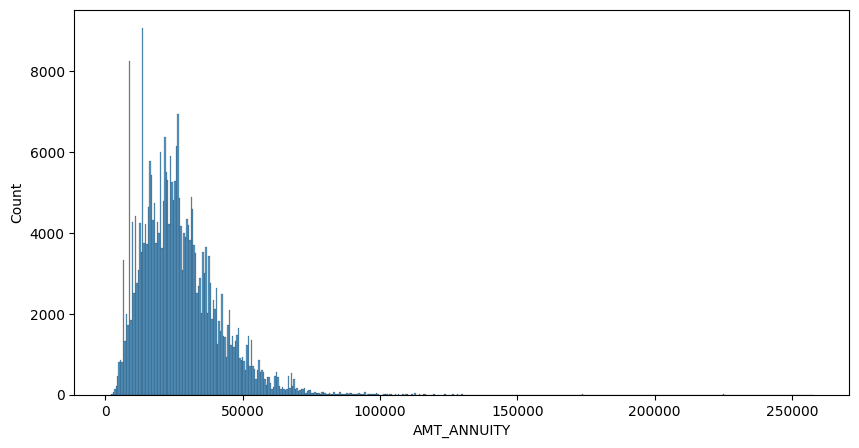

In [36]:
plt.figure(figsize = (10,5))
sns.histplot(cl_data['AMT_ANNUITY'])
plt.show()

#### Looking at the distribution of the Annuity, we'll impute the null data with the median


In [37]:
cl_data['AMT_ANNUITY'].fillna(cl_data['AMT_ANNUITY'].median(),inplace = True)

In [38]:
cl_data['AMT_ANNUITY'].isnull().value_counts()

False    307339
Name: AMT_ANNUITY, dtype: int64

In [39]:
cl_data['AMT_GOODS_PRICE'].head()

0     351000.0
1    1129500.0
2     135000.0
3     297000.0
4     513000.0
Name: AMT_GOODS_PRICE, dtype: float64

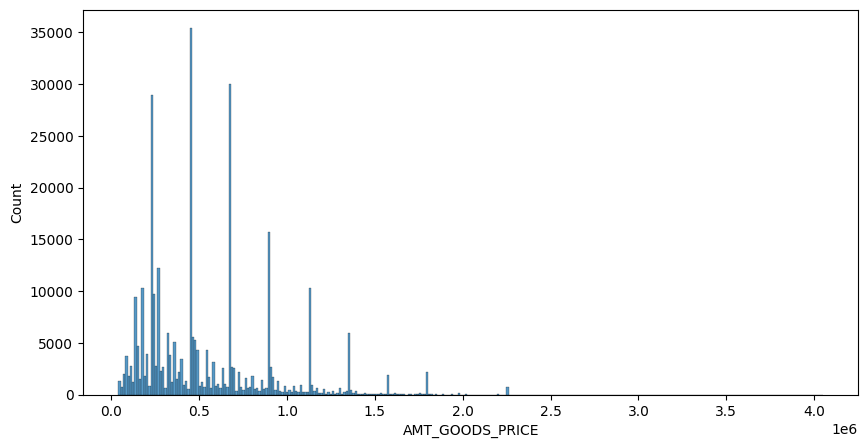

In [40]:
plt.figure(figsize = (10,5))
sns.histplot(cl_data['AMT_GOODS_PRICE'])
plt.show()

In [41]:
cl_data['AMT_GOODS_PRICE'].fillna(cl_data['AMT_GOODS_PRICE'].median(),inplace = True)

In [42]:
cl_data['AMT_GOODS_PRICE'].isnull().value_counts()

False    307339
Name: AMT_GOODS_PRICE, dtype: int64

In [43]:
cl_data['NAME_TYPE_SUITE'].describe()

count            306047
unique                7
top       Unaccompanied
freq             248393
Name: NAME_TYPE_SUITE, dtype: object

In [44]:
cl_data['NAME_TYPE_SUITE'].unique()

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', nan, 'Other_B', 'Group of people'], dtype=object)

In [45]:
cl_data['NAME_TYPE_SUITE'].fillna(cl_data['NAME_TYPE_SUITE'].mode,inplace = True)

In [46]:
cl_data['CNT_FAM_MEMBERS'].describe()

count    307337.000000
mean          2.152670
std           0.910687
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [47]:
cl_data['CNT_FAM_MEMBERS'].isnull().value_counts()

False    307337
True          2
Name: CNT_FAM_MEMBERS, dtype: int64

In [48]:
cl_data[cl_data['CNT_FAM_MEMBERS'].isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE
41982,148605,0,Revolving loans,M,N,Y,0,450000.0,675000.0,33750.0,450000.0,<bound method Series.mode of 0 Unaccom...,Commercial associate,Lower secondary,Unknown,Municipal apartment,0.015221,-12396,-1161,-3265.0,-4489,1,1,1,1,1,0,Managers,NaN,2,2,THURSDAY,15,0,1,1,0,1,1,Insurance,3.0,0.0,3.0,0.0,-876.0,0.0,0.0,0.0,0.0,0.0,0.0,0.664591
187348,317181,0,Revolving loans,F,N,Y,0,202500.0,585000.0,29250.0,450000.0,<bound method Series.mode of 0 Unaccom...,Commercial associate,Higher education,Unknown,House / apartment,0.031329,-12844,-232,-1597.0,-1571,1,1,0,1,0,0,Accountants,NaN,2,2,FRIDAY,14,0,0,0,0,0,0,Business Entity Type 2,1.0,0.0,1.0,0.0,-654.0,0.0,0.0,0.0,0.0,0.0,1.0,0.657910


#### The CNT_FAM_MEMBERS column refers to the number of family members and since the data for the above two row is not provided but these two rows looks important by looking at the income. Hence imputing data by using mode function

In [49]:
cl_data['CNT_FAM_MEMBERS'].fillna(cl_data['CNT_FAM_MEMBERS'].mode(),inplace = True)

In [50]:
cl_data.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                2
REGION_RATING_CLIENT           0
REGION_RAT

# Checking the data types

In [51]:
cl_data.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

### From the above observations it looks that the data types for each columns/Variables is correct

In [52]:
cl_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE
count,307339.000000,307339.000000,307339.000000,3.073390e+05,3.073390e+05,307339.000000,3.073390e+05,307339.000000,307339.000000,307339.000000,307339.000000,307339.000000,307339.0,307339.000000,307339.000000,307339.000000,307339.000000,307339.000000,307337.000000,307339.000000,307339.000000,307339.000000,307339.000000,307339.000000,307339.000000,307339.000000,307339.000000,307339.000000,307339.000000,307339.000000,307339.000000,307339.000000,307339.000000,307339.000000,307339.000000,307339.000000,307339.000000,307339.000000,307339.000000,307339.000000
mean,278189.641035,0.080728,0.417048,1.688117e+05,5.990953e+05,27110.854509,5.383818e+05,0.020868,-16037.459467,63813.519960,-4986.038192,-2994.391099,1.0,0.819893,0.199395,0.998136,0.281081,0.056726,2.152670,2.052496,2.031548,12.063575,0.015140,0.050771,0.040662,0.078168,0.230436,0.179548,1.417900,0.142995,1.401007,0.099756,-962.999528,0.005538,0.006045,0.029733,0.231341,0.229698,1.643934,0.509251
std,102788.814825,0.272418,0.722130,2.371820e+05,4.025182e+05,14494.410038,3.693168e+05,0.013832,4363.661600,141274.884504,3522.700046,1509.406309,0.0,0.384277,0.399547,0.043138,0.449527,0.231318,0.910687,0.509024,0.502724,3.265662,0.122108,0.219531,0.197506,0.268436,0.421113,0.383811,2.398607,0.446114,2.377445,0.361810,826.842733,0.078015,0.102972,0.190764,0.856821,0.744194,1.855929,0.149802
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000006
25%,189158.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16528.500000,2.385000e+05,0.010006,-19681.000000,-2761.000000,-7479.000000,-4299.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.413648
50%,278207.000000,0.000000,0.000000,1.480500e+05,5.135310e+05,24907.500000,4.500000e+05,0.018850,-15751.000000,-1214.000000,-4504.000000,-3254.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-757.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.524502
75%,367155.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12414.000000,-289.000000,-2010.000000,-1720.000000,1.0,1.000000,0.000000,1.000000,1.000000,0.000000,3.000000,2.000000,2.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,-274.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.622819
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,0.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000,3.000000,3.000000,23.000000,1.000000,1.000000,1

In [53]:
print(cl_data['DAYS_BIRTH'])
print(cl_data['DAYS_EMPLOYED'])
print(cl_data['DAYS_REGISTRATION'])
print(cl_data['DAYS_ID_PUBLISH'])

0         -9461
1        -16765
2        -19046
3        -19005
4        -19932
          ...  
307506    -9327
307507   -20775
307508   -14966
307509   -11961
307510   -16856
Name: DAYS_BIRTH, Length: 307339, dtype: int64
0           -637
1          -1188
2           -225
3          -3039
4          -3038
           ...  
307506      -236
307507    365243
307508     -7921
307509     -4786
307510     -1262
Name: DAYS_EMPLOYED, Length: 307339, dtype: int64
0        -3648.0
1        -1186.0
2        -4260.0
3        -9833.0
4        -4311.0
           ...  
307506   -8456.0
307507   -4388.0
307508   -6737.0
307509   -2562.0
307510   -5128.0
Name: DAYS_REGISTRATION, Length: 307339, dtype: float64
0        -2120
1         -291
2        -2531
3        -2437
4        -3458
          ... 
307506   -1982
307507   -4090
307508   -5150
307509    -931
307510    -410
Name: DAYS_ID_PUBLISH, Length: 307339, dtype: int64


In [54]:
cl_data['DAYS_BIRTH'] = abs(cl_data['DAYS_BIRTH'])

In [55]:
cl_data['DAYS_EMPLOYED'] = abs(cl_data['DAYS_EMPLOYED'])

In [56]:
cl_data['DAYS_REGISTRATION'] = abs(cl_data['DAYS_REGISTRATION'])

In [57]:
cl_data['DAYS_ID_PUBLISH'] = abs(cl_data['DAYS_ID_PUBLISH'])

In [58]:
cl_data['CODE_GENDER'].unique()

array(['M', 'F', 'XNA'], dtype=object)

In [59]:
cl_data['CODE_GENDER'].value_counts()

F      202305
M      105030
XNA         4
Name: CODE_GENDER, dtype: int64

#### This XNA is nothing but null values may be wrongly entered. Replacing these values with the maximum using mode

In [60]:
cl_data[cl_data['CODE_GENDER'] == 'XNA']

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE
35657,141289,0,Revolving loans,XNA,Y,Y,0,207000.0,382500.0,19125.0,337500.0,Unaccompanied,Working,Secondary / secondary special,Married,Municipal apartment,0.020713,20232,10044,10024.0,3537,1,1,1,1,1,0,Others,2.0,3,3,TUESDAY,10,0,0,0,0,0,0,Business Entity Type 1,0.0,0.0,0.0,0.0,-286.0,0.0,0.0,0.0,0.0,0.0,1.0,0.378740
38566,144669,0,Revolving loans,XNA,N,Y,2,157500.0,270000.0,13500.0,225000.0,Family,Working,Secondary / secondary special,Married,House / apartment,0.026392,13717,2797,2241.0,4659,1,1,1,1,1,0,Low-skill Laborers,4.0,2,2,FRIDAY,16,0,0,0,0,0,0,Industry: type 3,0.0,0.0,0.0,0.0,-493.0,0.0,0.0,0.0,3.0,0.0,4.0,0.510012
83382,196708,0,Revolving loans,XNA,N,Y,1,135000.0,405000.0,20250.0,225000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.035792,10647,1228,183.0,1671,1,1,1,1,1,0,Core staff,3.0,2,2,THURSDAY,15,0,0,0,0,0,0,Kindergarten,7.0,1.0,7.0,1.0,-851.0,0.0,0.0,0.0,0.0,0.0,3.0,0.380380
189640,319880,0,Revolving loans,XNA,Y,Y,0,247500.0,540000.0,27000.0,900000.0,Unaccompanied,Commercial associate,Incomplete higher,Civil marriage,House / apartment,0.035792,9649,2293,4099.0,2326,1,1,1,1,1,0,Others,2.0,2,2,FRIDAY,15,0,0,0,0,0,0,Medicine,10.0,4.0,10.0,4.0,-1681.0,0.0,0.0,0.0,0.0,1.0,6.0,0.557423


In [61]:
cl_data['CODE_GENDER'].replace({'XNA':'F'},inplace = True)

In [62]:
cl_data['CODE_GENDER'].value_counts()

F    202309
M    105030
Name: CODE_GENDER, dtype: int64

In [63]:
cl_data['OCCUPATION_TYPE'].unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', 'Others',
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

cl_data.head()

#### Here the DAYS_BIRTH variable is nothing  but the age of the Client in day, lest convert it into years

In [64]:
cl_data['AGE'] = (cl_data['DAYS_BIRTH']/365).astype(int)

In [65]:
cl_data['YEARS_EMPLOYED'] = (cl_data['DAYS_EMPLOYED']/365).astype(int)

In [66]:
cl_data['YEARS_REGISTRATION'] = (cl_data['DAYS_REGISTRATION']/365).astype(int)

In [67]:
cl_data['YEARS_ID_PUBLISH'] = (cl_data['DAYS_ID_PUBLISH']/365).astype(int)

In [68]:
# dropping off DAYS columns
cl_data.drop(cl_data.loc[:,'DAYS_BIRTH':'DAYS_ID_PUBLISH'],inplace = True,axis = 1)

In [69]:
cl_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,0.161787,25,1,9,5
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,0.466757,45,3,3,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,0.642739,52,0,11,6
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,0.0,0.650442,52,8,26,6
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,0.322738,54,8,11,9


#### Till here we have completed the Dataframe cleaning and correcting the data type errors

## Handling Outliers

In [70]:
cl_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH
count,307339.000000,307339.000000,307339.000000,3.073390e+05,3.073390e+05,307339.000000,3.073390e+05,307339.000000,307339.0,307339.000000,307339.000000,307339.000000,307339.000000,307339.000000,307337.000000,307339.000000,307339.000000,307339.000000,307339.000000,307339.000000,307339.000000,307339.000000,307339.000000,307339.000000,307339.000000,307339.000000,307339.000000,307339.000000,307339.000000,307339.000000,307339.000000,307339.000000,307339.000000,307339.000000,307339.000000,307339.000000,307339.000000,307339.000000,307339.000000,307339.000000
mean,278189.641035,0.080728,0.417048,1.688117e+05,5.990953e+05,27110.854509,5.383818e+05,0.020868,1.0,0.819893,0.199395,0.998136,0.281081,0.056726,2.152670,2.052496,2.031548,12.063575,0.015140,0.050771,0.040662,0.078168,0.230436,0.179548,1.417900,0.142995,1.401007,0.099756,-962.999528,0.005538,0.006045,0.029733,0.231341,0.229698,1.643934,0.509251,43.437227,185.019031,13.168475,7.713990
std,102788.814825,0.272418,0.722130,2.371820e+05,4.025182e+05,14494.410038,3.693168e+05,0.013832,0.0,0.384277,0.399547,0.043138,0.449527,0.231318,0.910687,0.509024,0.502724,3.265662,0.122108,0.219531,0.197506,0.268436,0.421113,0.383811,2.398607,0.446114,2.377445,0.361810,826.842733,0.078015,0.102972,0.190764,0.856821,0.744194,1.855929,0.149802,11.953697,381.969039,9.646349,4.134392
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000006,20.000000,0.000000,0.000000,0.000000
25%,189158.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16528.500000,2.385000e+05,0.010006,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.413648,34.000000,2.000000,5.000000,4.000000
50%,278207.000000,0.000000,0.000000,1.480500e+05,5.135310e+05,24907.500000,4.500000e+05,0.018850,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-757.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.524502,43.000000,6.000000,12.000000,8.000000
75%,367155.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,1.0,1.000000,0.000000,1.000000,1.000000,0.000000,3.000000,2.000000,2.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,-274.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.622819,53.000000,15.000000,20.000000,11.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000,3.000000,3.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,348.000000,34.000000,344.000000,24.000000,0.000000,4.000000,9.000000,8.000000,27.000000,261.000000,

In [71]:
# Analyse Income
cl_data['AMT_INCOME_TOTAL'].describe()

count    3.073390e+05
mean     1.688117e+05
std      2.371820e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.480500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

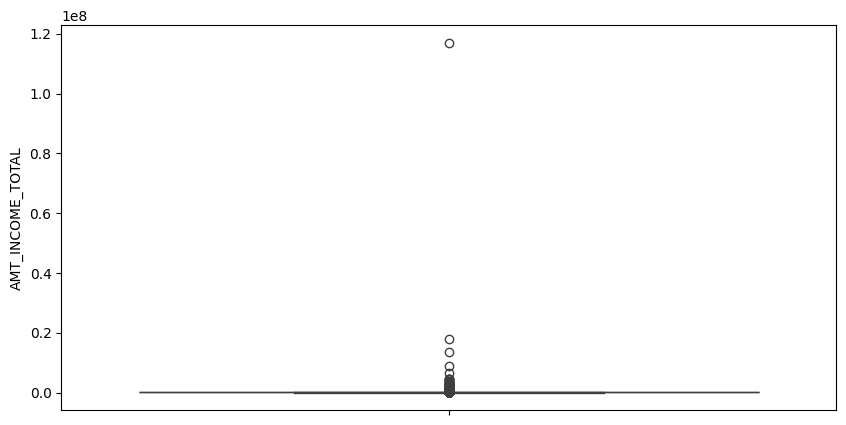

In [72]:
plt.figure(figsize = (10,5))
sns.boxplot(cl_data['AMT_INCOME_TOTAL'])
plt.show()

In [73]:
cl_data[cl_data['AMT_INCOME_TOTAL'] > 1*10**8]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH
12840,114967,1,Cash loans,F,N,Y,1,117000000.0,562491.0,26194.5,454500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010643,1,1,0,1,0,0,Laborers,3.0,2,2,TUESDAY,14,0,0,0,0,0,0,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.239838,34,2,18,9


In [74]:
cl_data = cl_data[~(cl_data['AMT_INCOME_TOTAL'] > 1*10**8)]

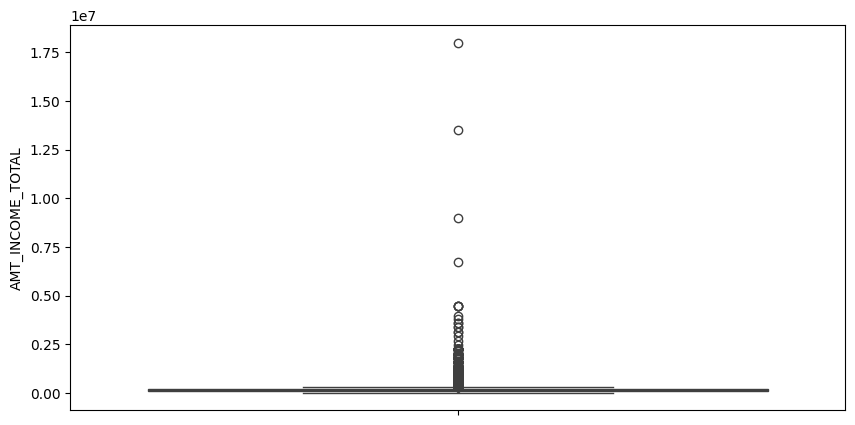

In [75]:
plt.figure(figsize = (10,5))
sns.boxplot(cl_data['AMT_INCOME_TOTAL'])
plt.show()

#### There are still many outliers in the Income variable. But these values are meaningful as it is spread more or less evenly, and we can keep those.



In [76]:
#### Analyse the AMT_Credit column
cl_data['AMT_CREDIT'].describe()

count    3.073380e+05
mean     5.990954e+05
std      4.025189e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

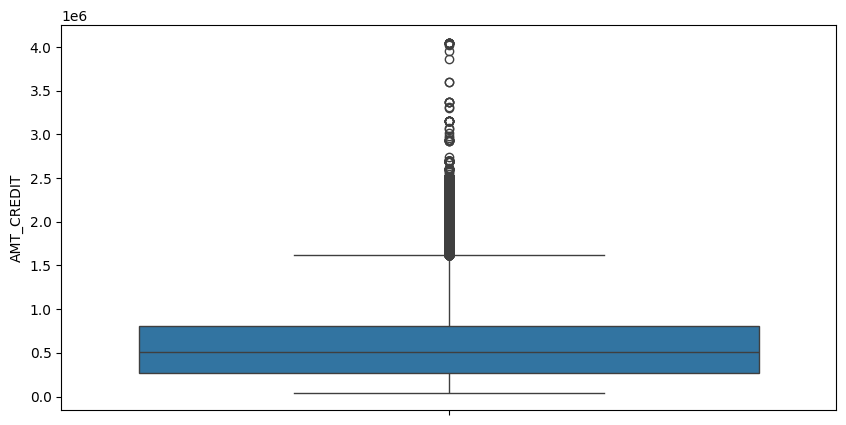

In [77]:
plt.figure(figsize = (10,5))
sns.boxplot(cl_data['AMT_CREDIT'])
plt.show()

In [78]:
cl_data['AMT_CREDIT'].quantile([0.5,.75,0.9,0.95,0.99])

0.50     513531.00
0.75     808650.00
0.90    1133748.00
0.95    1350000.00
0.99    1854317.52
Name: AMT_CREDIT, dtype: float64

In [79]:
cl_data[cl_data['AMT_CREDIT']>(cl_data['AMT_CREDIT'].quantile(0.99))]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH
189,100219,0,Cash loans,M,N,Y,1,315000.0,2250000.0,83515.5,2250000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.032561,1,1,0,1,0,1,Core staff,3.0,1,1,FRIDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.0,0.0,0.0,0.0,-926.0,0.0,0.0,0.0,0.0,0.0,3.0,0.536725,30,4,0,7
337,100389,0,Cash loans,M,Y,Y,0,247500.0,1971072.0,68643.0,1800000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.006207,1,1,1,1,0,0,Core staff,2.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,Self-employed,0.0,0.0,0.0,0.0,-2421.0,0.0,0.0,0.0,0.0,0.0,1.0,0.682066,38,1,8,12
341,100393,0,Cash loans,M,Y,Y,2,405000.0,2250000.0,59485.5,2250000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.007114,1,1,0,1,1,0,Core staff,4.0,2,2,FRIDAY,13,0,0,0,0,0,0,Police,0.0,0.0,0.0,0.0,-1014.0,0.0,0.0,0.0,0.0,0.0,1.0,0.687440,41,16,2,13
441,100508,0,Cash loans,F,Y,Y,0,450000.0,1971072.0,62019.0,1800000.0,"Spouse, partner",Commercial associate,Higher education,Married,House / apartment,0.032561,1,1,0,1,1,1,Managers,2.0,1,1,WEDNESDAY,13,0,0,0,0,0,0,Trade: type 3,0.0,0.0,0.0,0.0,-523.0,0.0,0.0,0.0,0.0,4.0,1.0,0.621544,50,7,11,4
485,100559,0,Cash loans,F,Y,Y,0,450000.0,2286211.5,116266.5,2182500.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.018850,1,1,0,1,0,0,Core staff,2.0,2,2,MONDAY,16,0,0,0,0,0,0,Security Ministries,1.0,0.0,1.0,0.0,-2675.0,0.0,0.0,0.0,0.0,0.0,0.0,0.503266,56,38,16,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307055,455739,0,Cash loans,F,N,Y,0,112500.0,2032992.0,70794.0,1755000.0,Unaccompanied,State servant,Secondary / secondary special,Married,House / apartment,0.072508,1,1,0,1,0,0,Medicine staff,2.0,1,1,TUESDAY,13,0,0,0,0,0,0,Medicine,1.0,0.0,1.0,0.0,-1866.0,0.0,0.0,0.0,0.0,0.0,5.0,0.686170,54,10,15,9
307095,455785,0,Cash loans,F,Y,Y,0,135000.0,2013840.0,53253.0,1800000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.031329,1,0,0,1,0,0,Others,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,XNA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,0.501501,55,1000,16,4
307165,455868,0,Cash loans,F,Y,Y,0,337500.0,1890000.0,71986.5,1890000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.072508,1,1,0,1,0,0,Accountants,2.0,1,1,TUESDAY,15,0,0,0,0,0,0,Business Entity Type 3,14.0,1.0,14.0,1.0,-698.0,0.0,0.0,0.0,0.0,1.0,4.0,0.685095,29,9,3,3
307214,455922,0,Cash loans,M,Y,N,2,256500.0,2290743.0,60556.5,2047500.0,"Spouse, partner",Commercial associate,Incomplete higher,Married,House / apartment,0.007020,1,1,0,1,0,0,Managers,4.0,2,2,SATURDAY,12,0,0,0,0,0,0,Business Entity Type 3,0.0,0.0,0.0,0.0,-16.0,0.0,0.0,0.0,0.0,0.0,1.0,0.612112,39,3,4,12


#### These are the entries which are having higher Credit amount in other words they are applying for heavy amount in the loan. As we also observe these are the clients with high income also the annuity amount which they are supposed to pay as an installment is high. We keep these entries.

In [80]:
# Analyse the AMT_GOODS_PRICE column
cl_data['AMT_GOODS_PRICE'].describe()

count    3.073380e+05
mean     5.383821e+05
std      3.693174e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

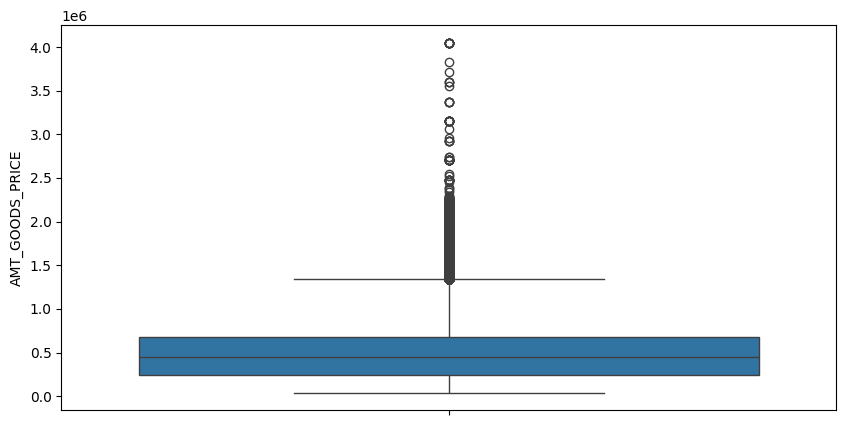

In [81]:
plt.figure(figsize = (10,5))
sns.boxplot(cl_data['AMT_GOODS_PRICE'])
plt.show()

#### The data points are evenly distributed hence lets not treat them as outliers.

In [82]:
# Analyse the Age column
cl_data.AGE.describe()

count    307338.000000
mean         43.437258
std          11.953704
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: AGE, dtype: float64

#### The maximum entry in the Age column is 69 which is possible.

In [83]:
cl_data['YEARS_EMPLOYED'].describe()

count    307338.000000
mean        185.019627
std         381.969518
min           0.000000
25%           2.000000
50%           6.000000
75%          15.000000
max        1000.000000
Name: YEARS_EMPLOYED, dtype: float64

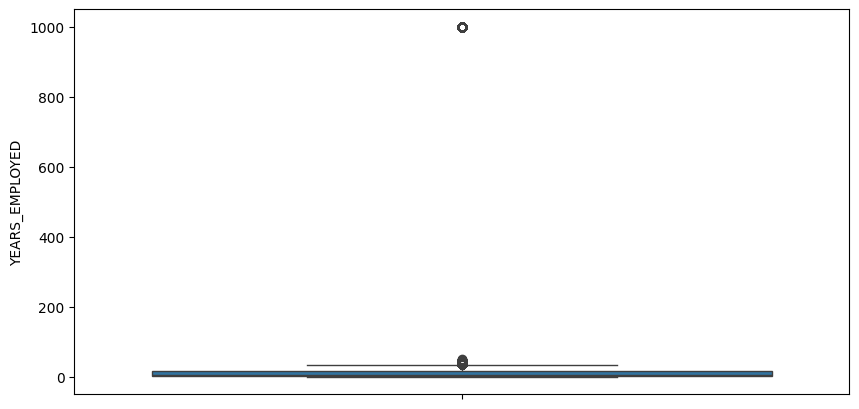

In [84]:
plt.figure(figsize = (10,5))
sns.boxplot(cl_data['YEARS_EMPLOYED'])
plt.show()

In [85]:
cl_data['YEARS_EMPLOYED'].quantile([0.5,0.75,0.9,0.95,0.99])

0.50       6.0
0.75      15.0
0.90    1000.0
0.95    1000.0
0.99    1000.0
Name: YEARS_EMPLOYED, dtype: float64

#### In the Years Employed coulmn i.e. the experience a value is 1000 not possible so dropping this entry

In [86]:
cl_data[cl_data['YEARS_EMPLOYED']>=1000]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,913500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,1,0,0,1,0,0,Others,2.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,XNA,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.514935,55,1000,20,9
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,135000.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.015221,1,0,0,1,1,0,Others,2.0,2,2,FRIDAY,7,0,0,0,0,0,0,XNA,0.0,0.0,0.0,0.0,-2396.0,0.0,0.0,0.0,0.0,0.0,2.0,0.643375,55,1000,14,6
23,100027,0,Cash loans,F,N,Y,0,83250.000,239850.0,23850.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.006296,1,0,0,1,1,0,Others,2.0,3,3,FRIDAY,12,0,0,0,0,0,0,XNA,0.0,0.0,0.0,0.0,-795.0,0.0,0.0,0.0,0.0,0.0,3.0,0.646681,68,1000,24,10
38,100045,0,Cash loans,F,N,Y,0,99000.000,247275.0,17338.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.006207,1,0,0,1,1,0,Others,2.0,2,2,FRIDAY,11,0,0,0,0,0,0,XNA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.701244,65,1000,26,13
43,100050,0,Cash loans,F,N,Y,0,108000.000,746280.0,42970.5,675000.0,Unaccompanied,Pensioner,Higher education,Single / not married,House / apartment,0.010966,1,0,0,1,0,0,Others,1.0,2,2,WEDNESDAY,9,0,0,0,0,0,0,XNA,0.0,0.0,0.0,0.0,-491.0,0.0,0.0,0.0,0.0,0.0,3.0,0.725483,64,1000,15,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307469,456209,0,Cash loans,F,N,Y,0,202500.000,703728.0,29943.0,607500.0,Unaccompanied,Pensioner,Secondary / secondary special,Single / not married,House / apartment,0.031329,1,0,0,1,0,0,Others,1.0,2,2,MONDAY,15,0,0,0,0,0,0,XNA,11.0,2.0,11.0,0.0,-1667.0,0.0,0.0,0.0,1.0,0.0,0.0,0.278119,61,1000,32,11
307483,456227,0,Cash loans,F,N,Y,0,99000.000,247275.0,16479.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Separated,House / apartment,0.007330,1,0,0,1,0,0,Others,1.0,2,2,MONDAY,12,0,0,0,0,0,0,XNA,1.0,1.0,1.0,1.0,-1775.0,0.0,0.0,0.0,0.0,0.0,5.0,0.555402,68,1000,30,11
307487,456231,0,Cash loans,M,N,Y,0,117000.000,1071909.0,31473.0,936000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.010147,1,0,0,1,0,0,Others,2.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,XNA,0.0,0.0,0.0,0.0,-846.0,0.0,0.0,0.0,0.0,1.0,8.0,0.281207,63,1000,15,11
307505,456249,0,Cash loans,F,N,Y,0,112500.000,225000.0,22050.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Single / not married,House / apartment,0.022800,1,0,0,1,1,0,Others,1.0,2,2,MONDAY,15,0,0,0,0,0,0,XNA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.544286,66,1000,20,6


In [87]:
cl_data = cl_data[~(cl_data['YEARS_EMPLOYED']>=1000)]

In [88]:
cl_data['YEARS_EMPLOYED'].describe()

count    251996.000000
mean          6.038040
std           6.416529
min           0.000000
25%           2.000000
50%           4.000000
75%           8.000000
max          49.000000
Name: YEARS_EMPLOYED, dtype: float64

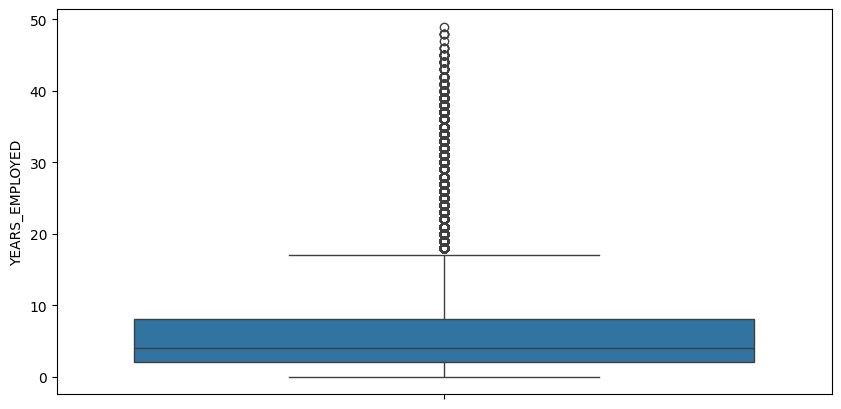

In [89]:
plt.figure(figsize = (10,5))
sns.boxplot(cl_data['YEARS_EMPLOYED'])
plt.show()

#### Now the maximum experience for a Client happens to be 49 years whcih is acceptable

#### Let us also check the Family status of the clients

In [90]:
cl_data['NAME_FAMILY_STATUS'].describe()

count      251996
unique          6
top       Married
freq       163838
Name: NAME_FAMILY_STATUS, dtype: object

In [91]:
cl_data['NAME_FAMILY_STATUS'].unique()

array(['Single / not married', 'Married', 'Civil marriage', 'Widow',
       'Separated', 'Unknown'], dtype=object)

In [92]:
cl_data[cl_data['NAME_FAMILY_STATUS'] == 'Married']

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,0.466757,45,3,3,0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.0,0.0,0.0,0.0,-2536.0,0.0,0.0,0.0,0.0,1.0,1.0,0.487726,46,4,13,1
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,1,1,0,1,1,0,Accountants,3.0,2,2,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3,1.0,0.0,1.0,0.0,-1562.0,0.0,0.0,0.0,1.0,1.0,2.0,0.663607,37,8,3,1
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.003122,1,1,1,1,0,0,Managers,2.0,3,3,MONDAY,16,0,0,0,0,1,1,Other,2.0,0.0,2.0,0.0,-1070.0,0.0,0.0,0.0,0.0,0.0,0.0,0.627467,51,1,12,6
10,100014,0,Cash loans,F,N,Y,1,112500.0,652500.0,21177.0,652500.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.022800,1,1,0,1,0,0,Core staff,3.0,2,2,SATURDAY,15,0,0,0,0,0,0,Medicine,0.0,0.0,0.0,0.0,-844.0,0.0,0.0,0.0,1.0,0.0,0.0,0.445189,27,1,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307500,456244,0,Cash loans,F,N,Y,0,261000.0,1303812.0,35982.0,1138500.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.031329,1,1,0,1,0,1,Others,2.0,2,2,FRIDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.0,0.0,0.0,0.0,-1459.0,0.0,0.0,0.0,1.0,0.0,5.0,0.674368,55,14,0,10
307501,456245,0,Cash loans,F,N,Y,3,81000.0,269550.0,11871.0,225000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.009175,1,1,1,1,0,0,Low-skill Laborers,5.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,Industry: type 1,2.0,1.0,2.0,1.0,-448.0,0.0,0.0,0.0,0.0,0.0,0.0,0.575481,35,2,3,10
307502,456246,0,Cash loans,F,N,Y,1,94500.0,225000.0,10620.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010966,1,1,1,1,0,0,Laborers,3.0,2,2,MONDAY,16,0,0,0,0,1,1,School,0.0,0.0,0.0,0.0,-1516.0,0.0,0.0,0.0,0.0,0.0,1.0,0.524277,44,23,23,12
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,9,0,0,0,1,1,0,Business Entity Type 1,0.0,0.0,0.0,0.0,-322.0,0.0,0.0,0.0,0.0,0.0,0.0,0.587593,32,13,7,2


In [93]:
cl_data[cl_data['NAME_FAMILY_STATUS'] == 'Civil marriage']

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,0.0,0.650442,52,8,26,6
30,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,1,1,0,1,0,1,Others,2.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.0,0.0,0.0,0.0,-1634.0,0.0,0.0,0.0,1.0,0.0,5.0,0.445045,41,7,14,10
31,100036,0,Cash loans,F,N,Y,0,112500.0,512064.0,25033.5,360000.0,Family,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008575,1,1,0,1,0,0,Private service staff,2.0,2,2,TUESDAY,12,0,0,0,0,0,0,Services,2.0,0.0,2.0,0.0,-397.0,0.0,0.0,0.0,0.0,2.0,5.0,0.450861,30,3,21,7
32,100037,0,Cash loans,F,N,N,0,90000.0,199008.0,20893.5,180000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.010032,1,1,1,1,0,0,Laborers,2.0,2,2,SATURDAY,11,0,0,0,0,0,0,Business Entity Type 2,0.0,0.0,0.0,0.0,-2766.0,0.0,0.0,0.0,0.0,0.0,2.0,0.678802,35,12,19,12
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,1,1,1,1,1,0,Sales staff,2.0,3,3,THURSDAY,11,0,0,0,0,0,0,Self-employed,1.0,0.0,1.0,0.0,-1480.0,0.0,0.0,0.0,0.0,0.0,2.0,0.514029,36,9,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307468,456208,0,Cash loans,F,N,Y,1,135000.0,305955.0,21888.0,283500.0,Unaccompanied,Working,Higher education,Civil marriage,House / apartment,0.020246,1,1,0,1,0,0,Others,3.0,3,3,THURSDAY,9,0,0,0,0,0,0,Industry: type 12,2.0,0.0,2.0,0.0,-499.0,0.0,0.0,0.0,0.0,1.0,2.0,0.420961,26,3,20,2
307475,456215,1,Cash loans,F,N,N,1,144000.0,1303200.0,46809.0,1125000.0,Unaccompanied,Working,Higher education,Civil marriage,House / apartment,0.007330,1,1,1,1,0,0,Laborers,3.0,2,2,THURSDAY,13,0,0,0,0,0,0,Construction,0.0,0.0,0.0,0.0,-1492.0,0.0,0.0,0.0,1.0,0.0,6.0,0.547358,36,6,1,12
307477,456217,0,Cash loans,F,N,Y,0,360000.0,796396.5,38443.5,643500.0,Unaccompanied,State servant,Higher education,Civil marriage,House / apartment,0.007020,1,1,0,1,0,0,Medicine staff,2.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,Medicine,0.0,0.0,0.0,0.0,-1353.0,0.0,0.0,0.0,0.0,2.0,1.0,0.607634,50,1,8,5
307486,456230,0,Cash loans,F,Y,Y,1,292500.0,355536.0,18283.5,270000.0,Unaccompanied,Commercial associate,Higher education,Civil marriage,House / apartment,0.072508,1,1,0,1,1,0,Others,3.0,1,1,SATURDAY,17,0,0,0,0,0,0,Business Entity Type 2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.430398,43,3,13,12


#### Considering Married and Civil Marriage as same and Single/Unmarried as Single.Also there are few with unknow status hence dropping these entries as we are unaware about their family status and it is not logical to updated at our end.

In [94]:
cl_data['NAME_FAMILY_STATUS'].replace({'Civil marriage':'Married','Single / not married':'Single'},inplace = True)

In [95]:
cl_data[cl_data['NAME_FAMILY_STATUS']== 'Unknown']

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH
41982,148605,0,Revolving loans,M,N,Y,0,450000.0,675000.0,33750.0,450000.0,<bound method Series.mode of 0 Unaccom...,Commercial associate,Lower secondary,Unknown,Municipal apartment,0.015221,1,1,1,1,1,0,Managers,NaN,2,2,THURSDAY,15,0,1,1,0,1,1,Insurance,3.0,0.0,3.0,0.0,-876.0,0.0,0.0,0.0,0.0,0.0,0.0,0.664591,33,3,8,12
187348,317181,0,Revolving loans,F,N,Y,0,202500.0,585000.0,29250.0,450000.0,<bound method Series.mode of 0 Unaccom...,Commercial associate,Higher education,Unknown,House / apartment,0.031329,1,1,0,1,0,0,Accountants,NaN,2,2,FRIDAY,14,0,0,0,0,0,0,Business Entity Type 2,1.0,0.0,1.0,0.0,-654.0,0.0,0.0,0.0,0.0,0.0,1.0,0.657910,35,0,4,4


In [96]:
cl_data = cl_data[~(cl_data['NAME_FAMILY_STATUS']== 'Unknown')]

In [97]:
cl_data['NAME_FAMILY_STATUS'].unique()

array(['Single', 'Married', 'Widow', 'Separated'], dtype=object)

In [98]:
cl_data['NAME_FAMILY_STATUS'].mode()

0    Married
Name: NAME_FAMILY_STATUS, dtype: object

In [99]:
cl_data['NAME_FAMILY_STATUS'].value_counts()

Married      190008
Single        39291
Separated     15991
Widow          6704
Name: NAME_FAMILY_STATUS, dtype: int64

#### We can use the previous applications to understand whether an applicant is new or not. If an applicant is a returing one, we can use the data to understand information like whether the previous one was a successful or failure, and why. If successful, is the loan over or not, was there any due or not

In [100]:
prev_data = pd.read_csv(path+'previous_application.csv')

In [101]:
prev_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
prev_data.shape

(1670214, 37)

In [103]:
prev_data.info(verbose = True,null_counts = True )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [104]:
prev_data.isnull().sum()/len(prev_data)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

#### Instead of checking the Previous application data, we sort only the required columns/variables for our Analysis

In [105]:
prev_data['NAME_CONTRACT_TYPE'].value_counts(normalize = True)*100

Cash loans         44.757917
Consumer loans     43.656142
Revolving loans    11.565225
XNA                 0.020716
Name: NAME_CONTRACT_TYPE, dtype: float64

In [106]:
prev_data['NAME_CONTRACT_STATUS'].value_counts(normalize = True)*100

Approved        62.074740
Canceled        18.938831
Refused         17.403638
Unused offer     1.582791
Name: NAME_CONTRACT_STATUS, dtype: float64

In [107]:
prev_data['FLAG_LAST_APPL_PER_CONTRACT'].value_counts(normalize = True)*100

Y    99.49258
N     0.50742
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: float64

In [108]:
# Keeping only the Last applications from the Previous data
prev_data = prev_data[prev_data['FLAG_LAST_APPL_PER_CONTRACT']== 'Y']
prev_data.shape

(1661739, 37)

In [109]:
prev_data['NFLAG_LAST_APPL_IN_DAY'].value_counts(normalize = True)

1    0.999527
0    0.000473
Name: NFLAG_LAST_APPL_IN_DAY, dtype: float64

#### Sorting the Previous dataset based on the application Id also we aill drop the duplicate Id's

In [110]:
prev_data = prev_data.sort_values(by = 'SK_ID_PREV',ascending = False).drop_duplicates('SK_ID_CURR')

In [111]:
prev_data.shape

(338857, 37)

#### Let's sort the previous data set to only the required columns

In [112]:
prev_data = prev_data[['SK_ID_CURR','AMT_CREDIT','NAME_CONTRACT_STATUS','CODE_REJECT_REASON','NAME_YIELD_GROUP','DAYS_TERMINATION',]]
prev_data.shape

(338857, 6)

In [113]:
prev_data.describe()

,SK_ID_CURR,AMT_CREDIT,DAYS_TERMINATION
count,338857.000000,3.388570e+05,241613.000000
mean,278149.909581,1.696456e+05,84373.947213
std,102879.193103,2.750492e+05,154783.432532
min,100001.000000,0.000000e+00,-2844.000000
25%,189061.000000,3.195000e+04,-1180.000000
50%,278221.000000,7.938000e+04,-421.000000
75%,367302.000000,1.755000e+05,-26.000000
max,456255.000000,4.050000e+06,365243.000000


In [114]:
prev_data.isnull().sum()/len(prev_data)*100

SK_ID_CURR               0.000000
AMT_CREDIT               0.000000
NAME_CONTRACT_STATUS     0.000000
CODE_REJECT_REASON       0.000000
NAME_YIELD_GROUP         0.000000
DAYS_TERMINATION        28.697651
dtype: float64

In [115]:
prev_data['DAYS_TERMINATION'].describe()

count    241613.000000
mean      84373.947213
std      154783.432532
min       -2844.000000
25%       -1180.000000
50%        -421.000000
75%         -26.000000
max      365243.000000
Name: DAYS_TERMINATION, dtype: float64

In [116]:
prev_data['DAYS_TERMINATION'].value_counts(normalize = True)*100

 365243.0    23.294690
-9.0          0.091055
-15.0         0.090641
-17.0         0.090227
-144.0        0.090227
               ...    
-2760.0       0.000414
-2768.0       0.000414
-2801.0       0.000414
-2844.0       0.000414
-2790.0       0.000414
Name: DAYS_TERMINATION, Length: 2785, dtype: float64

#### Fixing namolies in Days Termination column

In [117]:
prev_data[prev_data['DAYS_TERMINATION']>0]

,SK_ID_CURR,AMT_CREDIT,NAME_CONTRACT_STATUS,CODE_REJECT_REASON,NAME_YIELD_GROUP,DAYS_TERMINATION
888701,451578,149969.97,Approved,XAP,middle,365243.0
1345642,425374,630000.00,Approved,XAP,XNA,365243.0
298226,337804,45000.00,Approved,XAP,XNA,365243.0
1489940,107385,963684.00,Approved,XAP,low_action,365243.0
728908,424008,78399.00,Approved,XAP,low_action,365243.0
...,...,...,...,...,...,...
372316,380704,148995.00,Approved,XAP,low_normal,365243.0
33706,331428,302787.00,Approved,XAP,low_normal,365243.0
588245,373582,278905.50,Approved,XAP,low_normal,365243.0
1325772,357802,88047.00,Approved,XAP,low_normal,365243.0


#### Since the Days_Termination column represents Relative to application date of current application when was the expected termination of the previous application. The Value 365243.0 clearly is an error. But as these values are well below the droppable range hence replacing them with NAN

In [118]:
prev_data['DAYS_TERMINATION'].replace({365243.0:np.NaN},inplace = True)

In [119]:
prev_data.describe()

,SK_ID_CURR,AMT_CREDIT,DAYS_TERMINATION
count,338857.000000,3.388570e+05,185330.000000
mean,278149.909581,1.696456e+05,-923.375929
std,102879.193103,2.750492e+05,751.742111
min,100001.000000,0.000000e+00,-2844.000000
25%,189061.000000,3.195000e+04,-1480.000000
50%,278221.000000,7.938000e+04,-688.000000
75%,367302.000000,1.755000e+05,-293.000000
max,456255.000000,4.050000e+06,-2.000000


#### Let's join the two data Frames but first we also need to change the names of the variable in prev data so that they are not mixed with current data

#### Rename the column names so that the common column be easily differetiated

In [120]:
names = {'AMT_CREDIT': 'PREV_AMT_CREDIT', 'NAME_CONTRACT_STATUS': 'PREV_CONTRACT_STATUS',
         'DAYS_TERMINATION':'PREV_DAYS_TERMINATION', 'CODE_REJECT_REASON':'PREV_REJECT_REASON',
        'NAME_YIELD_GROUP':'PREV_YIELD_GROUP'}


In [121]:
prev_data.rename(columns = names,inplace = True)

In [122]:
prev_data.head()

,SK_ID_CURR,PREV_AMT_CREDIT,PREV_CONTRACT_STATUS,PREV_REJECT_REASON,PREV_YIELD_GROUP,PREV_DAYS_TERMINATION
205485,406596,30912.75,Unused offer,CLIENT,XNA,NaN
717142,140761,41499.00,Unused offer,CLIENT,XNA,NaN
886179,237546,60673.50,Refused,LIMIT,middle,NaN
359118,100125,59503.50,Refused,SCO,middle,NaN
70058,250234,108180.00,Refused,SCO,low_action,NaN


In [123]:
new_data = pd.merge(left = cl_data,right = prev_data,how = 'left',left_on = 'SK_ID_CURR',right_on = 'SK_ID_CURR')
new_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,PREV_AMT_CREDIT,PREV_CONTRACT_STATUS,PREV_REJECT_REASON,PREV_YIELD_GROUP,PREV_DAYS_TERMINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single,House / apartment,0.018801,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,0.161787,25,1,9,5,179055.0,Approved,XAP,low_normal,-17.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,0.466757,45,3,3,0,348637.5,Approved,XAP,middle,-639.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single,House / apartment,0.010032,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,0.642739,52,0,11,6,20106.0,Approved,XAP,middle,-714.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.008019,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,0.0,0.650442,52,8,26,6,0.0,Canceled,XAP,XNA,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single,House / apartment,0.028663,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,0.322738,54,8,11,9,284400.0,Approved,XAP,middle,NaN


In [124]:
new_data.isnull().sum()

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                         0
AMT_GOODS_PRICE                     0
NAME_TYPE_SUITE                     0
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE                          0
FLAG_EMAIL                          0
OCCUPATION_TYPE                     0
CNT_FAM_MEMBERS                     0
REGION_RATING_CLIENT                0
REGION_RATIN

In [125]:
new_data['PREV_CONTRACT_STATUS'].value_counts(normalize = True)

Approved        0.737057
Canceled        0.129361
Refused         0.116001
Unused offer    0.017580
Name: PREV_CONTRACT_STATUS, dtype: float64

In [126]:
new_data['PREV_CONTRACT_STATUS'].unique()

array(['Approved', 'Canceled', nan, 'Refused', 'Unused offer'],
      dtype=object)

#### Since the Previous Contract status is having null value we treat them as Fresh applications

In [127]:
new_data['PREV_CONTRACT_STATUS'].fillna('Fresh',inplace = True)

In [128]:
new_data['PREV_REJECT_REASON'].unique()

array(['XAP', nan, 'SCO', 'HC', 'LIMIT', 'CLIENT', 'SCOFR', 'XNA',
       'SYSTEM', 'VERIF'], dtype=object)

In [129]:
# Treating XNA as Nan
new_data['PREV_REJECT_REASON'].replace({'XNA':np.NaN},inplace = True)

In [130]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251994 entries, 0 to 251993
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   251994 non-null  int64  
 1   TARGET                       251994 non-null  int64  
 2   NAME_CONTRACT_TYPE           251994 non-null  object 
 3   CODE_GENDER                  251994 non-null  object 
 4   FLAG_OWN_CAR                 251994 non-null  object 
 5   FLAG_OWN_REALTY              251994 non-null  object 
 6   CNT_CHILDREN                 251994 non-null  int64  
 7   AMT_INCOME_TOTAL             251994 non-null  float64
 8   AMT_CREDIT                   251994 non-null  float64
 9   AMT_ANNUITY                  251994 non-null  float64
 10  AMT_GOODS_PRICE              251994 non-null  float64
 11  NAME_TYPE_SUITE              251994 non-null  object 
 12  NAME_INCOME_TYPE             251994 non-null  object 
 13 

# UNIVARIATE ANALYSIS

#### Analysing Target Variable

In [131]:
new_data.TARGET.value_counts(normalize = True)

0    0.913403
1    0.086597
Name: TARGET, dtype: float64

#### Lets seperate the defaulting clients i.e. with Target = 1

In [132]:
new_data['Target_type']  = new_data['TARGET'].apply(lambda x: 'default' if x== 1 else 'safe')

In [133]:
new_data['Target_type'].value_counts(normalize = True)*100

safe       91.34027
default     8.65973
Name: Target_type, dtype: float64

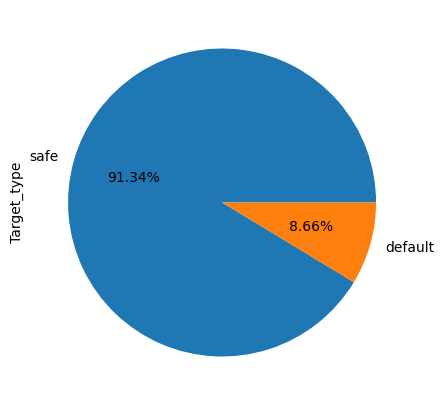

In [134]:

plt.figure(figsize = (5,5))
new_data['Target_type'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%')
plt.show()

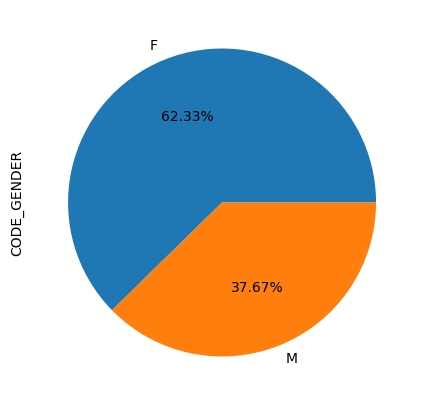

In [135]:
# Lets check the Gender of the Clients.
plt.figure(figsize = (5,5))
cl_data['CODE_GENDER'].value_counts().plot.pie(autopct='%1.2f%%')
plt.show()

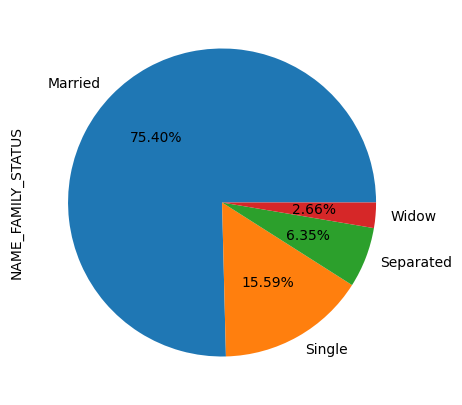

In [136]:
plt.figure(figsize = (5,5))
cl_data['NAME_FAMILY_STATUS'].value_counts().plot.pie(autopct='%1.2f%%')
plt.show()

#### As from the pie chart it seems that Married clients are the majority applicants, this may be happening because the family is planing for a home or may be for their child education.

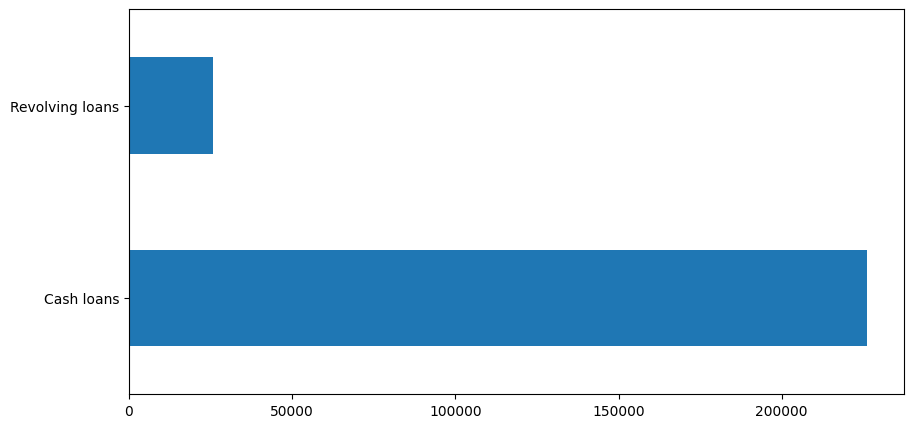

In [137]:
# let us also check the Loan Type
# plt.style.use('ggplot')
plt.figure(figsize = (10,5))
cl_data['NAME_CONTRACT_TYPE'].value_counts().plot.barh()
plt.show()

#### Application for Cash loans are way higher than Revolving loans, seems people are least interested in Credit Cards.

In [138]:
# Education Type of CLients
new_data['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    173193
Higher education                  66635
Incomplete higher                  9745
Lower secondary                    2283
Academic degree                     138
Name: NAME_EDUCATION_TYPE, dtype: int64

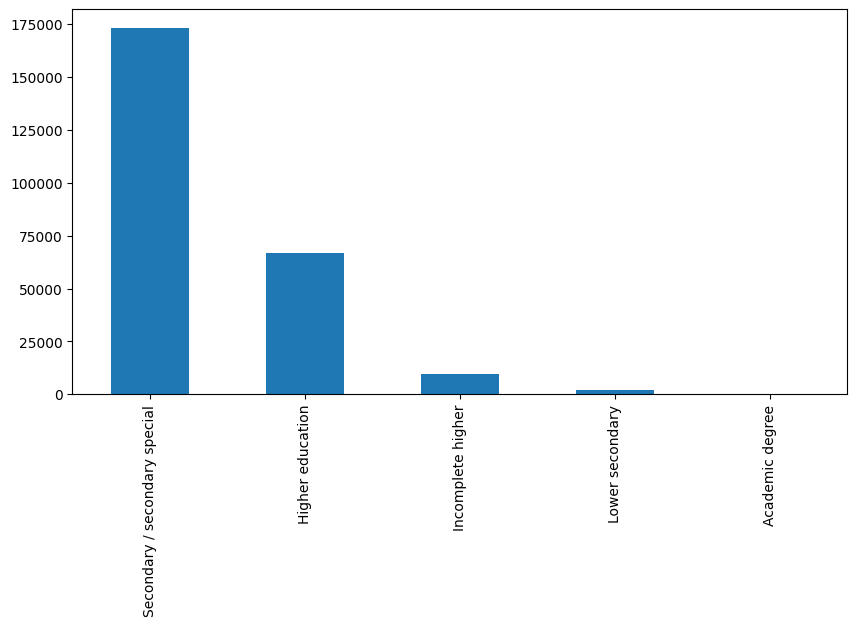

In [139]:
plt.figure(figsize = (10,5))
new_data['NAME_EDUCATION_TYPE'].value_counts().plot.bar()
plt.show()

In [140]:
# Occupation of the Clients
new_data['OCCUPATION_TYPE'].value_counts(normalize = True)*100

Laborers                 21.888220
Others                   16.267054
Sales staff              12.728874
Core staff               10.933990
Managers                  8.477583
Drivers                   7.379541
High skill tech staff     4.513996
Accountants               3.890966
Medicine staff            3.385795
Security staff            2.666730
Cooking staff             2.358389
Cleaning staff            1.844488
Private service staff     1.052009
Low-skill Laborers        0.830178
Waiters/barmen staff      0.534537
Secretaries               0.517869
Realty agents             0.297626
HR staff                  0.223418
IT staff                  0.208735
Name: OCCUPATION_TYPE, dtype: float64

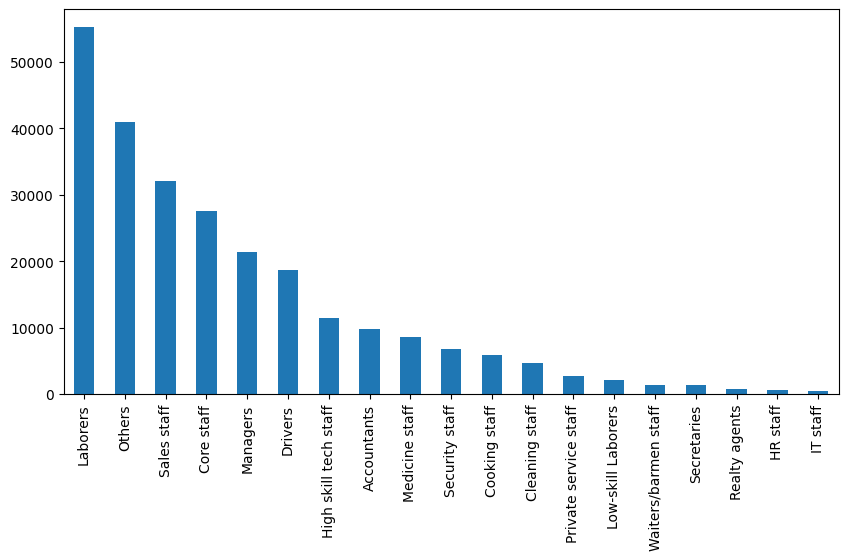

In [141]:
plt.figure(figsize = (10,5))
new_data['OCCUPATION_TYPE'].value_counts().plot.bar()
plt.show()

In [142]:
# Anaysing the Age of the clients
# First let's bin the ages into age groups
age_bins = ['<30','30-40','40-50','50-60','60+']
new_data['AGE_GRP'] = pd.cut(new_data.AGE,[0,30,40,50,60,200],labels = age_bins)
new_data['AGE_GRP'].value_counts(normalize = True)*100

30-40    32.742049
40-50    28.630840
<30      20.867560
50-60    15.981333
60+       1.778217
Name: AGE_GRP, dtype: float64

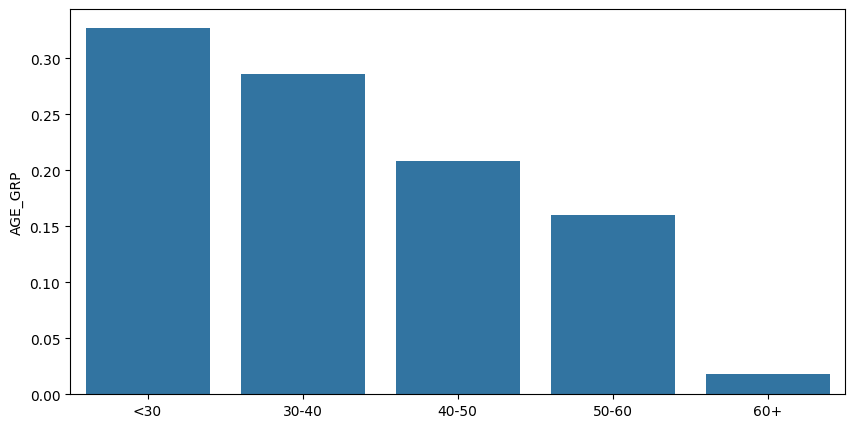

In [143]:
plt.figure(figsize = (10,5))
sns.barplot(y = new_data['AGE_GRP'].value_counts(normalize = True),x = age_bins)
plt.show()

In [144]:
new_data['PREV_CONTRACT_STATUS'].value_counts(normalize = True)*100

Approved        69.727851
Canceled        12.237990
Refused         10.974071
Fresh            5.396954
Unused offer     1.663135
Name: PREV_CONTRACT_STATUS, dtype: float64

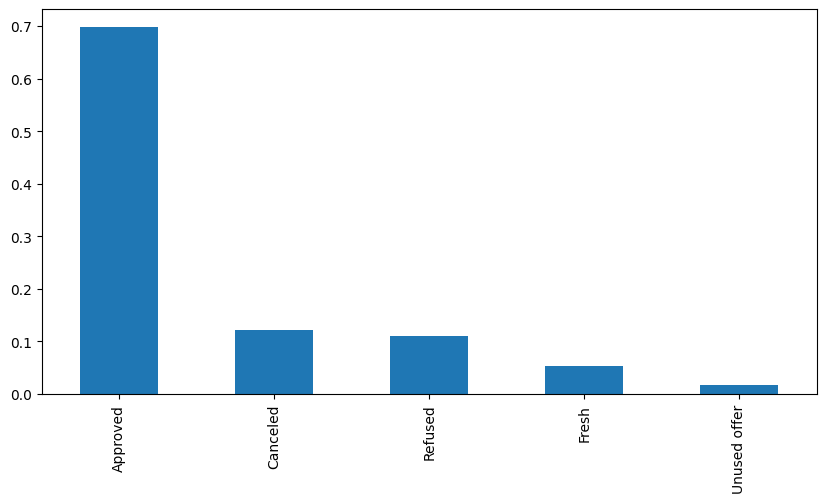

In [145]:
plt.figure(figsize = (10,5))
new_data['PREV_CONTRACT_STATUS'].value_counts(normalize = True).plot.bar()
plt.show()

In [146]:
new_data['PREV_REJECT_REASON'].value_counts()

XAP       206547
HC         14214
LIMIT       6604
SCO         4393
CLIENT      4191
SCOFR       1631
VERIF        392
SYSTEM        24
Name: PREV_REJECT_REASON, dtype: int64

In [147]:
# Income of Clients
new_data[new_data['AMT_INCOME_TOTAL']<10**6]['AMT_INCOME_TOTAL']

0         202500.0
1         270000.0
2          67500.0
3         135000.0
4         121500.0
            ...   
251989    153000.0
251990    157500.0
251991    153000.0
251992    171000.0
251993    157500.0
Name: AMT_INCOME_TOTAL, Length: 251755, dtype: float64

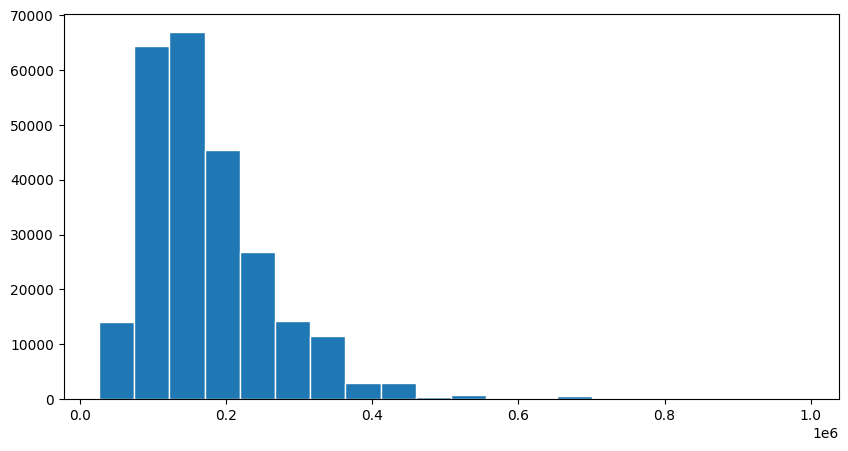

In [148]:
plt.figure(figsize = (10,5))
plt.hist(new_data[new_data['AMT_INCOME_TOTAL']<10**6]['AMT_INCOME_TOTAL'],bins = 20,edgecolor = 'White')
plt.show()

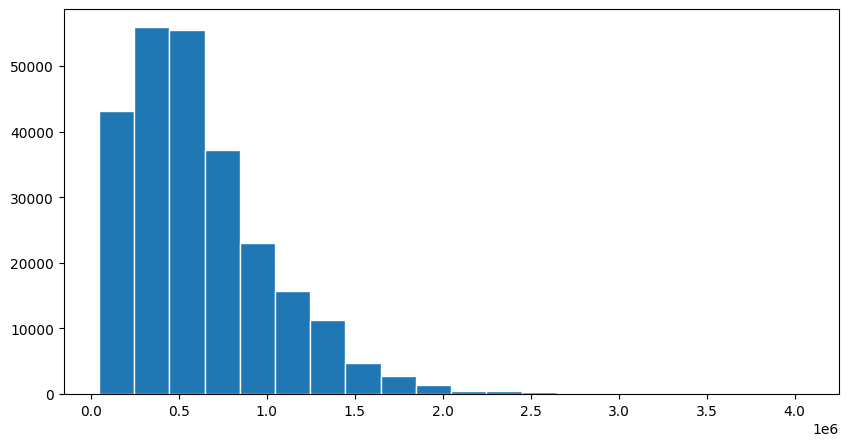

In [149]:
plt.figure(figsize = (10,5))
plt.hist(new_data['AMT_CREDIT'],bins = 20,edgecolor = 'White')
plt.show()


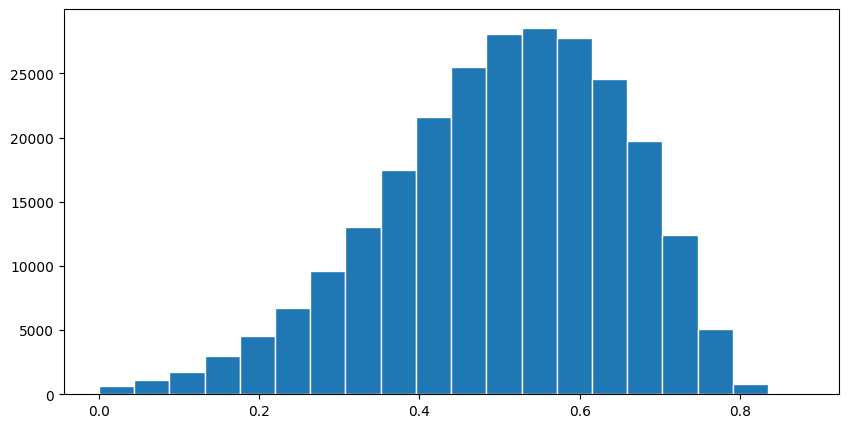

In [150]:
plt.figure(figsize = (10,5))
plt.hist(new_data['EXT_SOURCE'],bins = 20,edgecolor = 'White')
plt.show()

In [151]:
new_data[new_data['TARGET'] == 0]['EXT_SOURCE']

1         0.466757
2         0.642739
3         0.650442
4         0.322738
5         0.487726
            ...   
251988    0.451321
251989    0.530725
251990    0.413601
251991    0.499536
251993    0.518984
Name: EXT_SOURCE, Length: 230172, dtype: float64

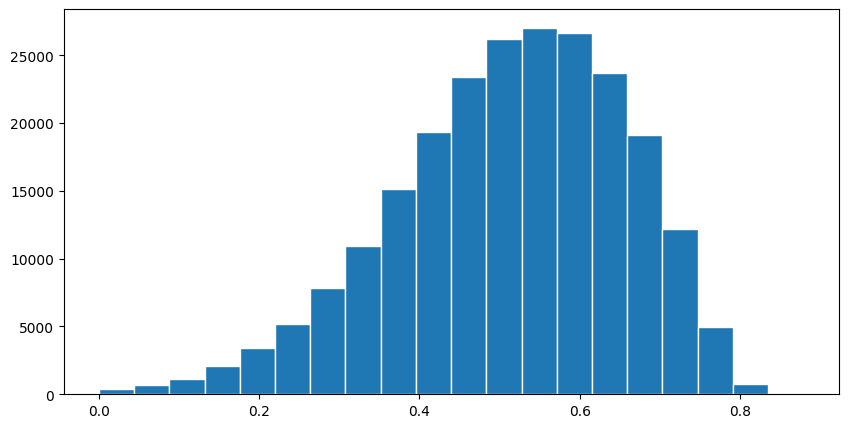

In [152]:
plt.figure(figsize = (10,5))
plt.hist(new_data[new_data['TARGET'] == 0]['EXT_SOURCE'],bins = 20,edgecolor = 'White')
plt.show()

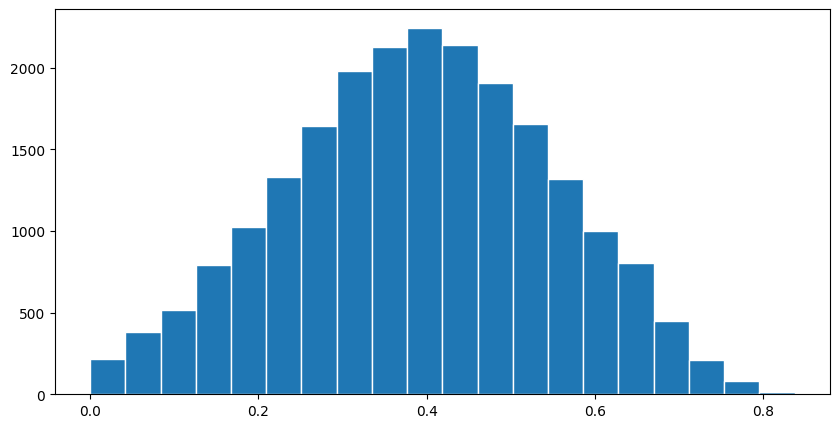

In [153]:
plt.figure(figsize = (10,5))
plt.hist(new_data[new_data['TARGET'] == 1]['EXT_SOURCE'],bins = 20,edgecolor = 'White')
plt.show()

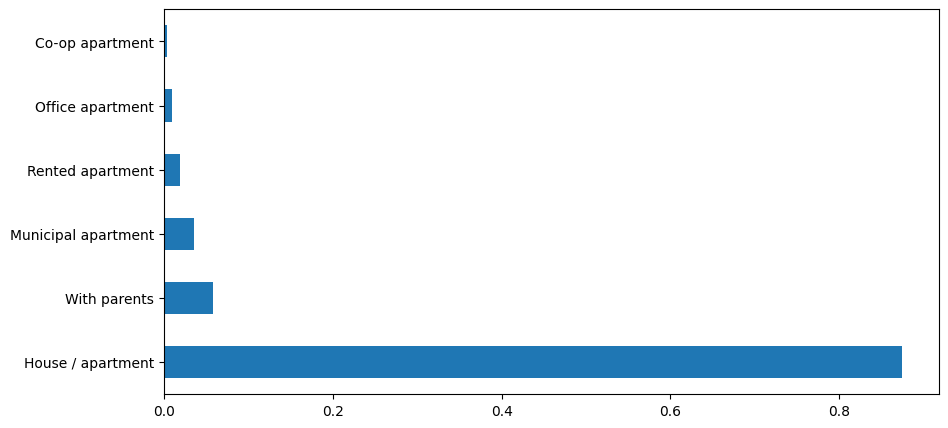

In [154]:
plt.figure(figsize = (10,5))
new_data['NAME_HOUSING_TYPE'].value_counts(normalize = True).plot.barh()
plt.show()

In [155]:
# Income Type of Clients
new_data['NAME_INCOME_TYPE'].value_counts(normalize = True)*100


Working                 62.976103
Commercial associate    28.398295
State servant            8.608538
Student                  0.007143
Pensioner                0.003968
Businessman              0.003968
Maternity leave          0.001984
Name: NAME_INCOME_TYPE, dtype: float64

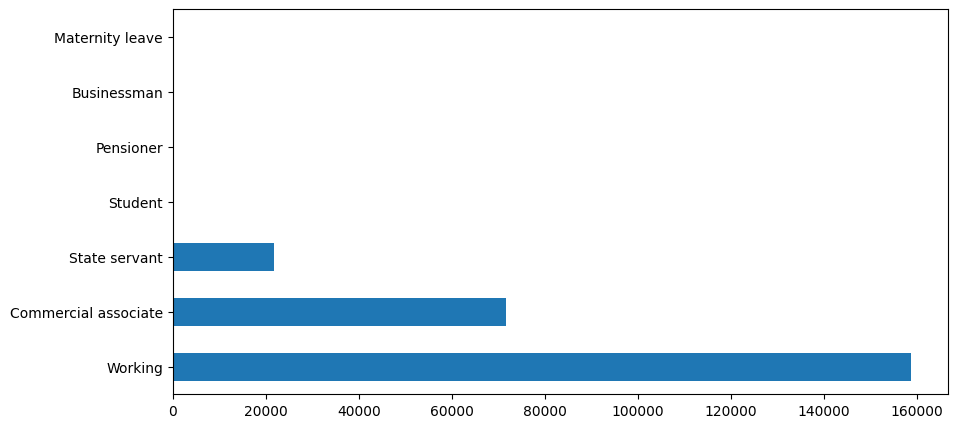

In [156]:
plt.figure(figsize = (10,5))
new_data['NAME_INCOME_TYPE'].value_counts().plot.barh()
plt.show()

# BIVARIATE ANALYSIS

# NUMERICAL VS CATEGORICAL

In [157]:
# Occupation and Income
new_data.groupby('OCCUPATION_TYPE').AMT_INCOME_TOTAL.agg(['mean','median'])

,mean,median
OCCUPATION_TYPE,,
Accountants,194562.715502,178650.0
Cleaning staff,130819.769148,112500.0
Cooking staff,138407.309038,126000.0
Core staff,172668.240887,157500.0
Drivers,187004.324268,180000.0
HR staff,188916.282416,158400.0
High skill tech staff,182850.020209,157500.0
IT staff,213465.601711,180000.0
Laborers,164260.110786,157500.0


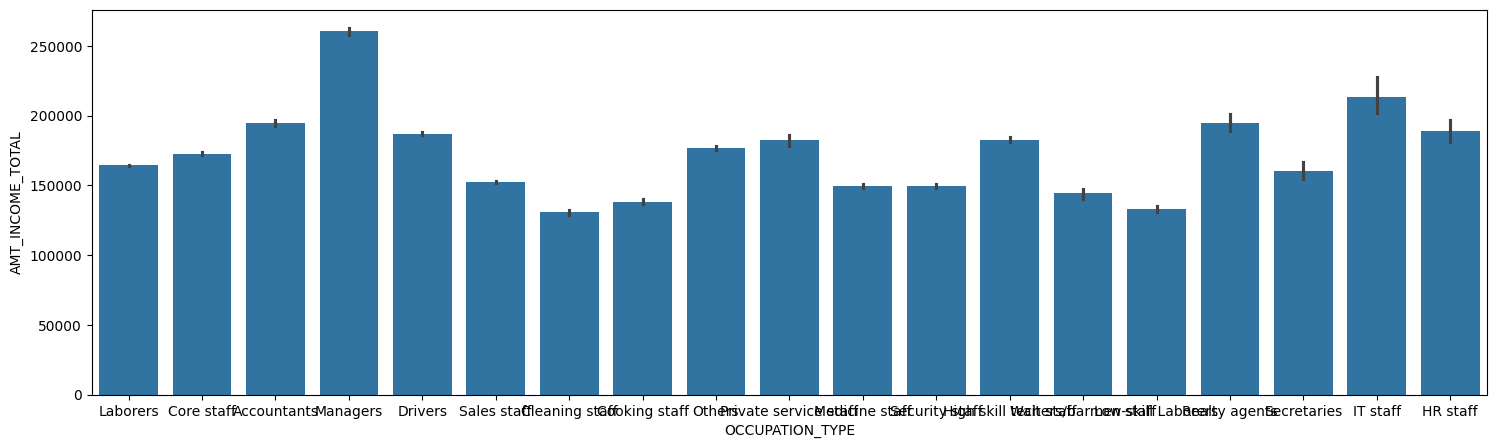

In [160]:
plt.figure(figsize = (18,5))
sns.barplot(y = new_data['AMT_INCOME_TOTAL'],x = new_data['OCCUPATION_TYPE'])
plt.show()

In [161]:
# Education vs Income
new_data.groupby('NAME_EDUCATION_TYPE').AMT_INCOME_TOTAL.agg(['mean','median'])

,mean,median
NAME_EDUCATION_TYPE,,
Academic degree,246808.695652,225000.0
Higher education,213234.275175,180000.0
Incomplete higher,183317.865931,157500.0
Lower secondary,145799.274639,135000.0
Secondary / secondary special,160821.131323,135000.0


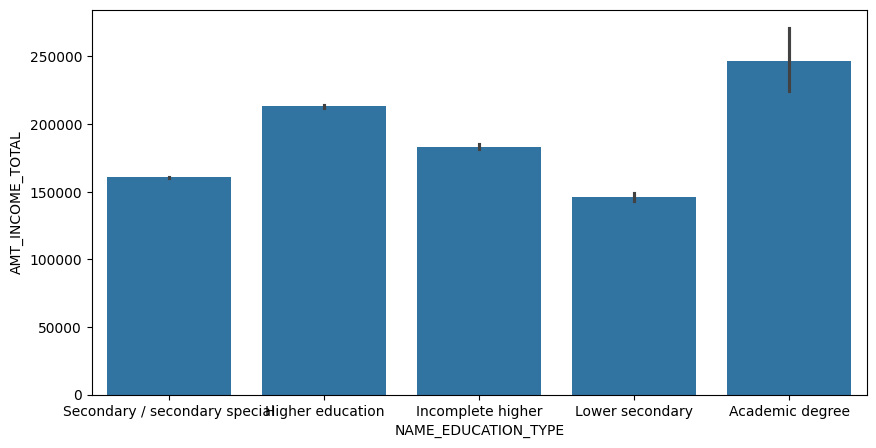

In [162]:
plt.figure(figsize = (10,5))
sns.barplot(y = new_data['AMT_INCOME_TOTAL'],x = new_data['NAME_EDUCATION_TYPE'])
plt.show()

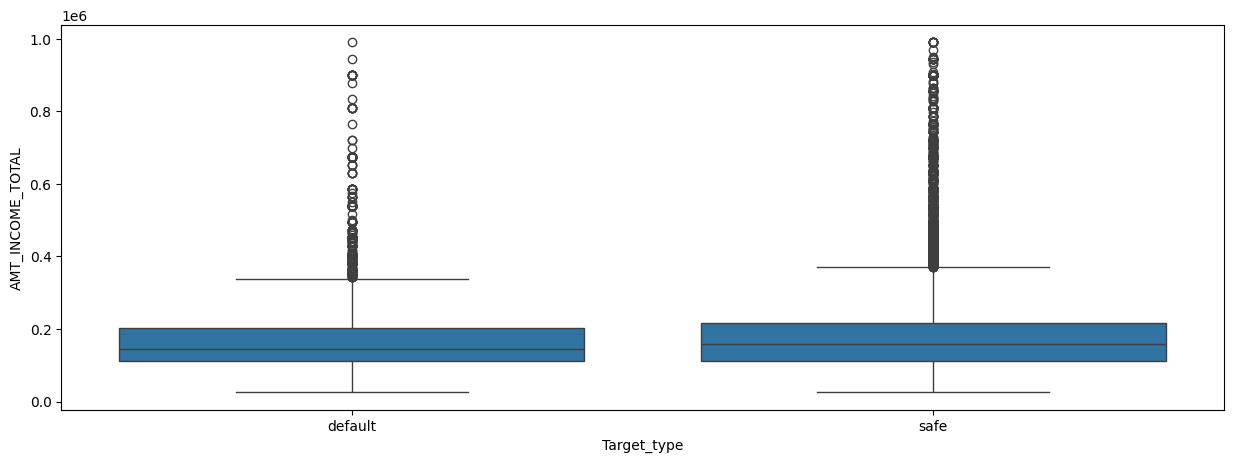

In [163]:
plt.figure(figsize=(15,5))
sns.boxplot(x = new_data['Target_type'],y = new_data[new_data['AMT_INCOME_TOTAL']<10**6].AMT_INCOME_TOTAL)
plt.show()

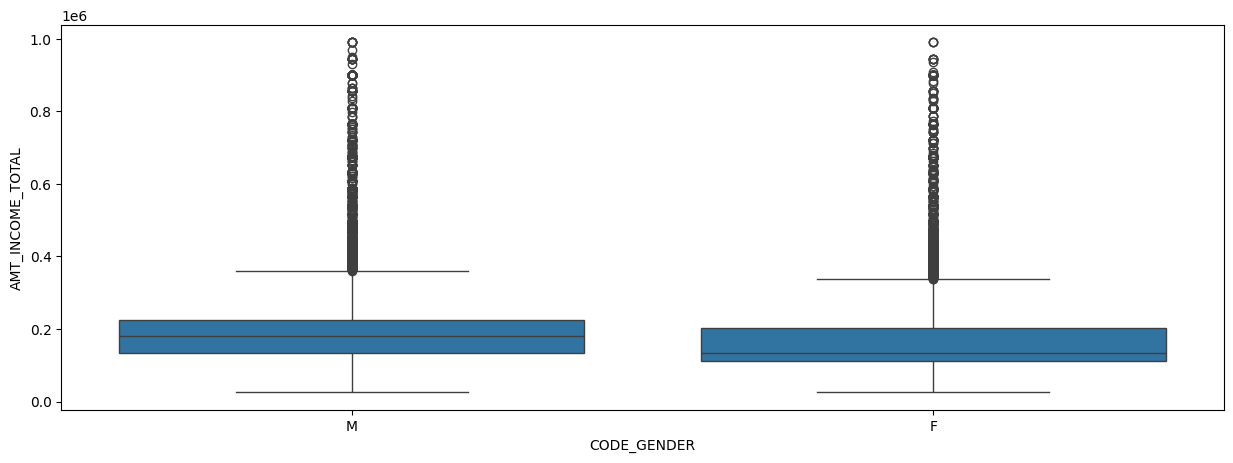

In [164]:
plt.figure(figsize=(15,5))
sns.boxplot(x= new_data['CODE_GENDER'],y = new_data[new_data['AMT_INCOME_TOTAL']<10**6].AMT_INCOME_TOTAL)
plt.show()

#### As we already saw that there is majority of Female clients but yet the Income total for Male clients seems to surpass

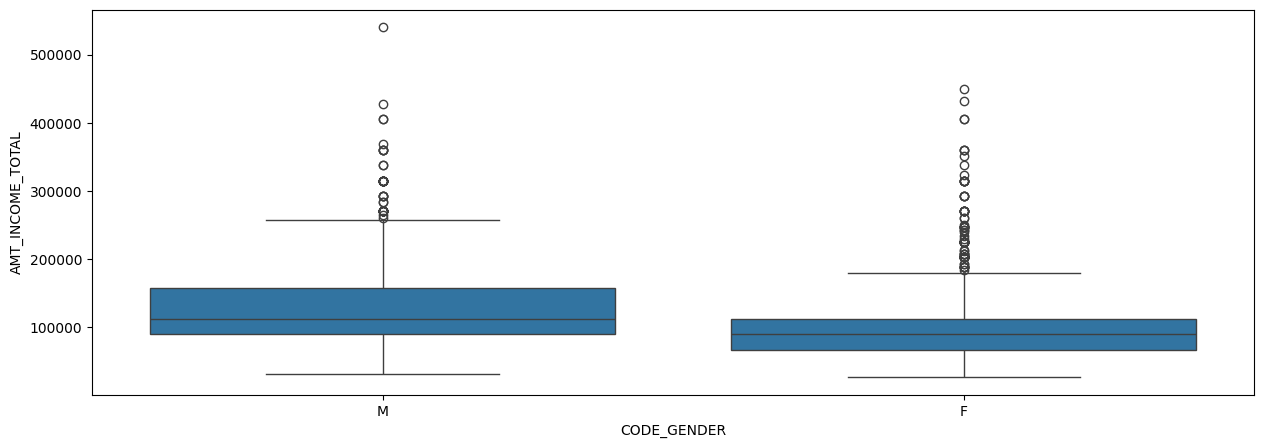

In [165]:
plt.figure(figsize=(15,5))
sns.boxplot(x= new_data['CODE_GENDER'],y = new_data[new_data['AMT_CREDIT']<10**5].AMT_INCOME_TOTAL)
plt.show()

#### We also find that the Male clients get more Credit amount than Female clients and that too with huge difference, as we clearly see even 75th percentile for Female client matches to the 50th percentile for the Male clients.

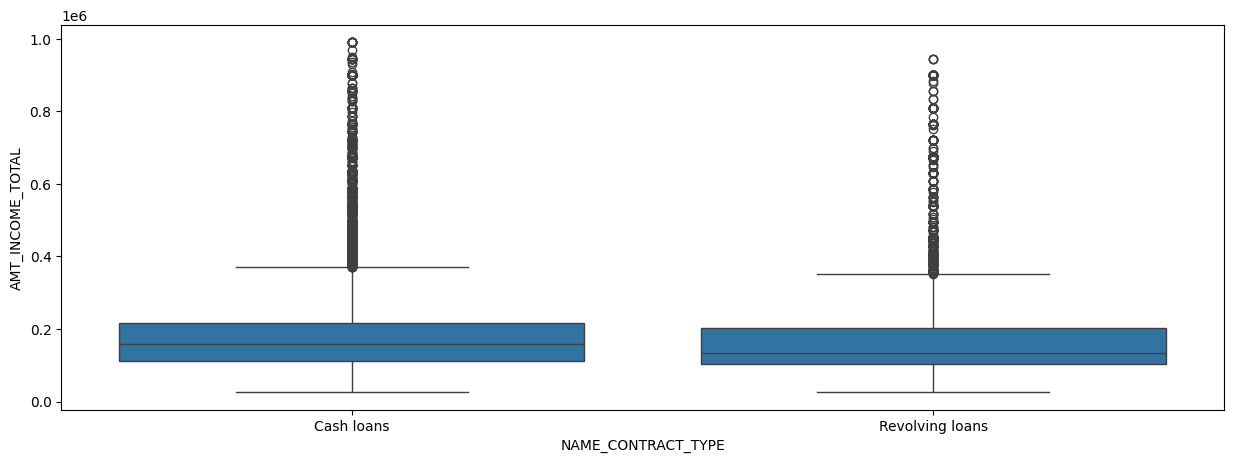

In [166]:
plt.figure(figsize=(15,5))
sns.boxplot(x= new_data['NAME_CONTRACT_TYPE'],y = new_data[new_data['AMT_INCOME_TOTAL']<10**6].AMT_INCOME_TOTAL)
plt.show()

## CATEGORICAL vs CATEGORICAL

In [167]:
new_data.groupby('CODE_GENDER').TARGET.mean()

CODE_GENDER
F    0.075828
M    0.104416
Name: TARGET, dtype: float64

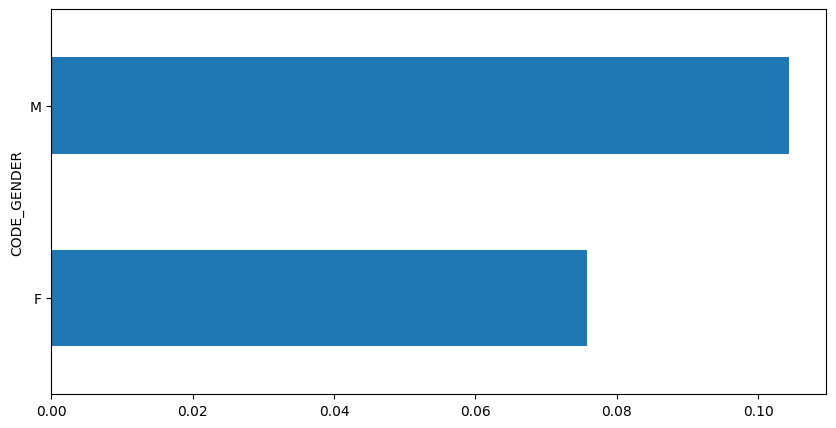

In [168]:
plt.figure(figsize = (10,5))
new_data.groupby('CODE_GENDER').TARGET.mean().plot.barh()
plt.show()

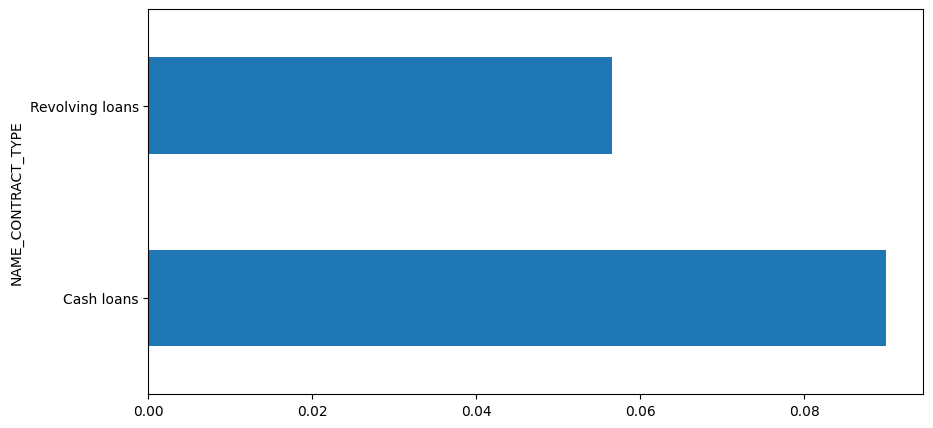

In [169]:
plt.figure(figsize = (10,5))
new_data.groupby('NAME_CONTRACT_TYPE').TARGET.mean().plot.barh()
plt.show()

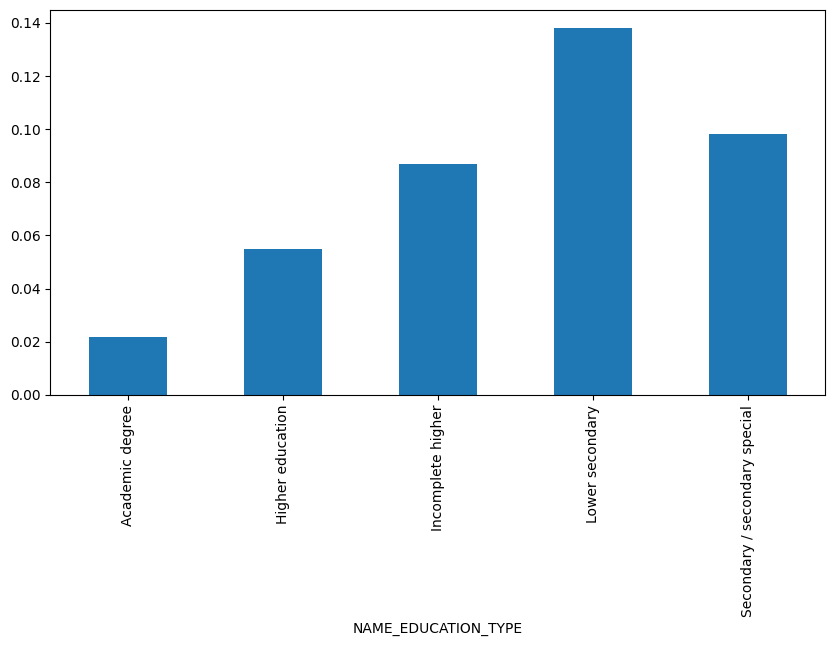

In [170]:
plt.figure(figsize = (10,5))
new_data.groupby('NAME_EDUCATION_TYPE').TARGET.mean().plot.bar()
plt.show()

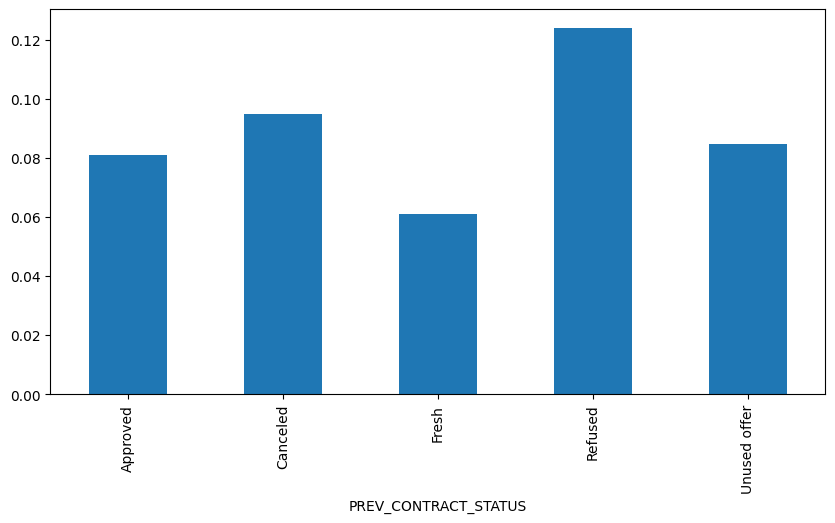

In [171]:
plt.figure(figsize = (10,5))
new_data.groupby('PREV_CONTRACT_STATUS').TARGET.mean().plot.bar()
plt.show()

## NUMERIC vs NUMERIC

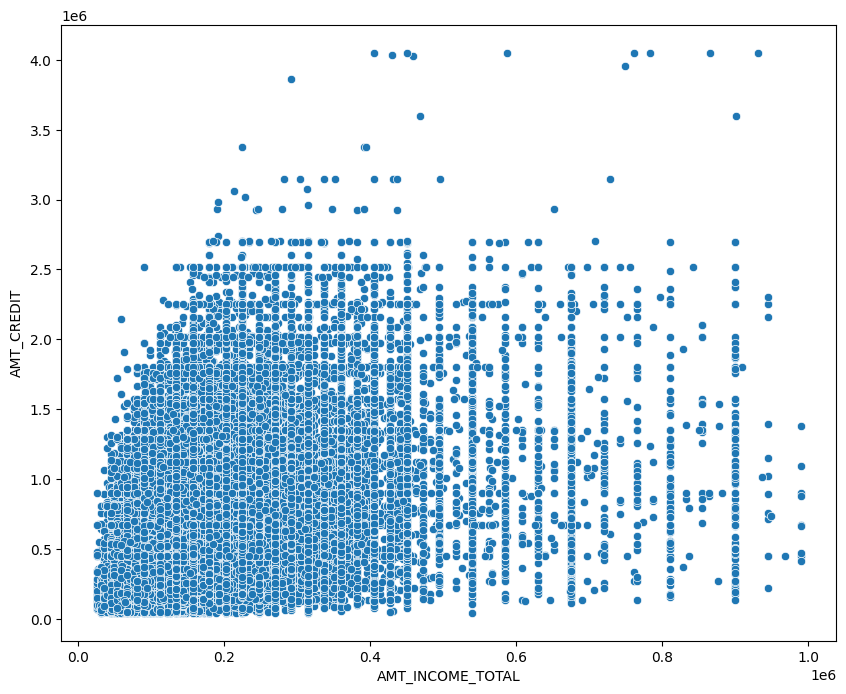

In [172]:
#Total Income vs Amount requested for Loan
plt.figure(figsize = (10,8))
sns.scatterplot(data = new_data[new_data.AMT_INCOME_TOTAL < 10**6], x = 'AMT_INCOME_TOTAL', y = 'AMT_CREDIT')
plt.show()

#### We see there is huge volume where the income and credit amount both are lower this may be an indicative of the requirements of smaller finance of Low to Average salaried. As we move further in ther plot, only few with higher salries are getting higher credit, which may be because only these few are having required rating for getting these higher credits.


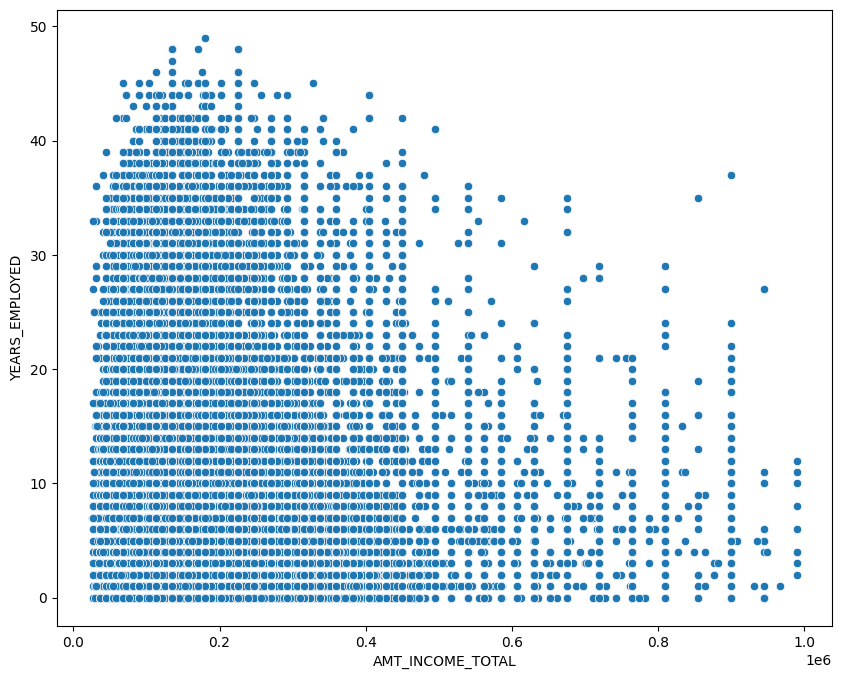

In [173]:
#Total Income vs Experience
plt.figure(figsize = (10,8))
sns.scatterplot(data = new_data[new_data.AMT_INCOME_TOTAL < 10**6], x = 'AMT_INCOME_TOTAL', y = 'YEARS_EMPLOYED')
plt.show()

#### Looking at the plot we can say even with lesser experience the clients are having higher salaries. This may be because of there Education and their Occupation type.

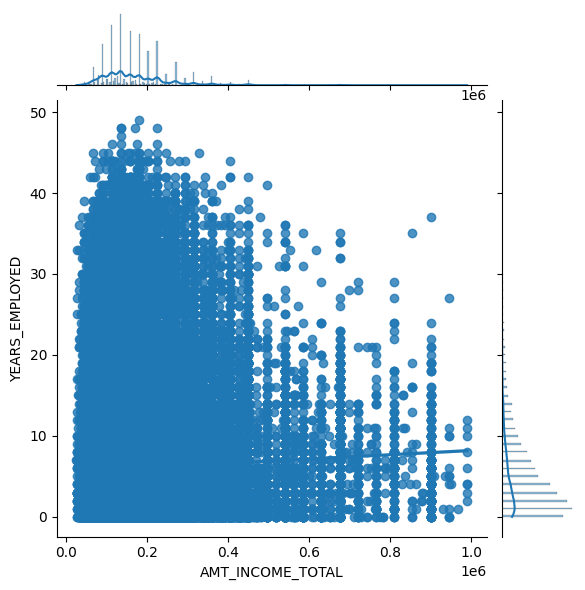

In [174]:
# We can further elaborate the above plot as:

sns.jointplot(data = new_data[new_data.AMT_INCOME_TOTAL < 10**6], x = 'AMT_INCOME_TOTAL', y = 'YEARS_EMPLOYED',kind ='reg')
plt.show()

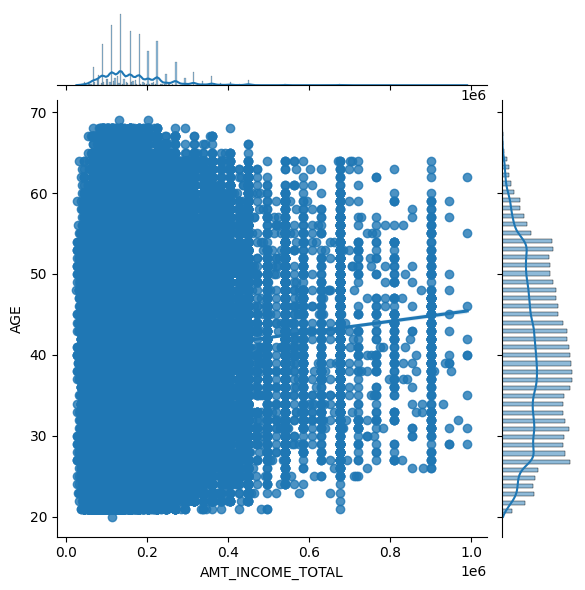

In [175]:
# AGE vs Income

sns.jointplot(data = new_data[new_data.AMT_INCOME_TOTAL < 10**6], x = 'AMT_INCOME_TOTAL', y = 'AGE',kind ='reg')
plt.show()

#### Above plot says that the age between 25 to 55 yeilds better income.

# MULTI-VARIATE ANALYSIS

### OCCUPATION_TYPE vs NAME_EDUCATION_TYPE vs TARGET

In [176]:
OET = pd.pivot_table(data = new_data, index ='OCCUPATION_TYPE', columns = 'NAME_EDUCATION_TYPE',values = 'TARGET')
OET

NAME_EDUCATION_TYPE,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special
OCCUPATION_TYPE,,,,,
Accountants,0.125000,0.038833,0.056433,0.166667,0.062112
Cleaning staff,0.000000,0.084337,0.102041,0.138889,0.095755
Cooking staff,0.000000,0.088993,0.093220,0.174603,0.105174
Core staff,0.000000,0.045701,0.084074,0.105691,0.078652
Drivers,0.000000,0.083415,0.103870,0.128514,0.117208
HR staff,NaN,0.044818,0.083333,NaN,0.100000
High skill tech staff,0.000000,0.047281,0.070085,0.133333,0.071429
IT staff,NaN,0.049853,0.038462,0.000000,0.113636
Laborers,0.000000,0.075882,0.086381,0.160274,0.109845


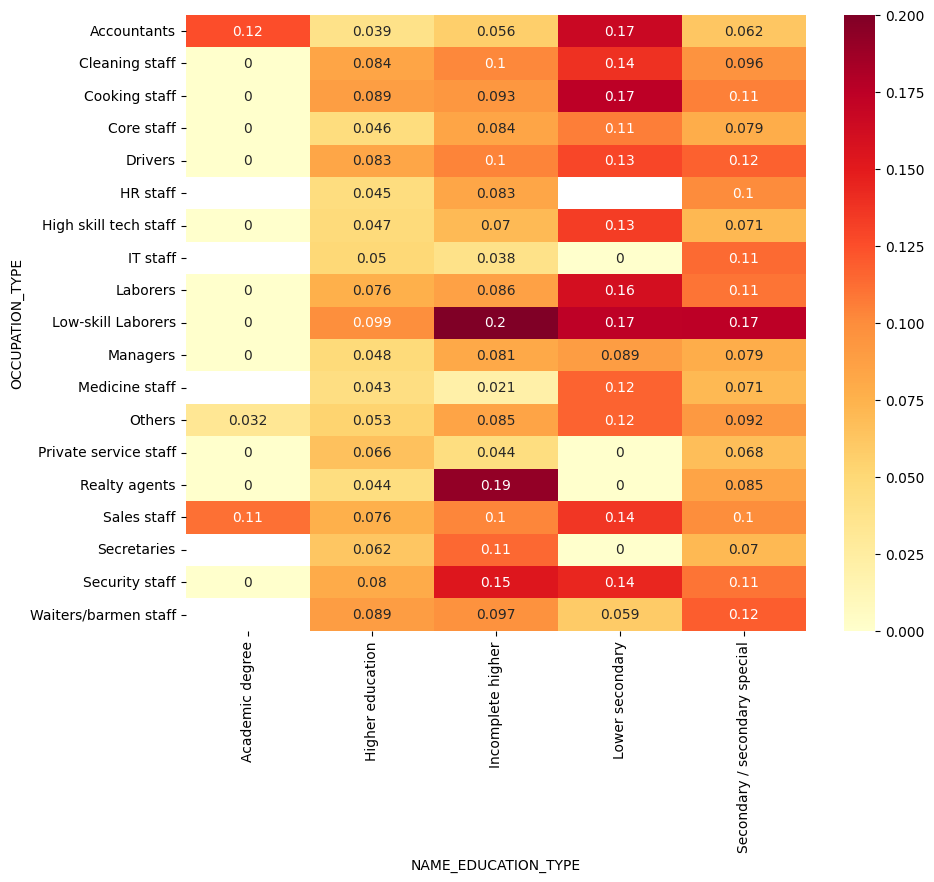

In [177]:
plt.figure(figsize = (10,8))
sns.heatmap(OET,annot = True,cmap="YlOrRd")
plt.show()

#### NAME_FAMILY_STATUS vs NAME_EDUCATION_TYPE vs TARGET

In [178]:
NNT = pd.pivot_table(data = new_data, index ='NAME_FAMILY_STATUS', columns = 'NAME_EDUCATION_TYPE',values = 'TARGET')
NNT

NAME_EDUCATION_TYPE,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special
NAME_FAMILY_STATUS,,,,,
Married,0.021739,0.052769,0.083761,0.134764,0.094699
Separated,0.000000,0.058464,0.083821,0.171429,0.097791
Single,0.034483,0.063992,0.096012,0.150127,0.124434
Widow,0.000000,0.048536,0.067416,0.082192,0.061939


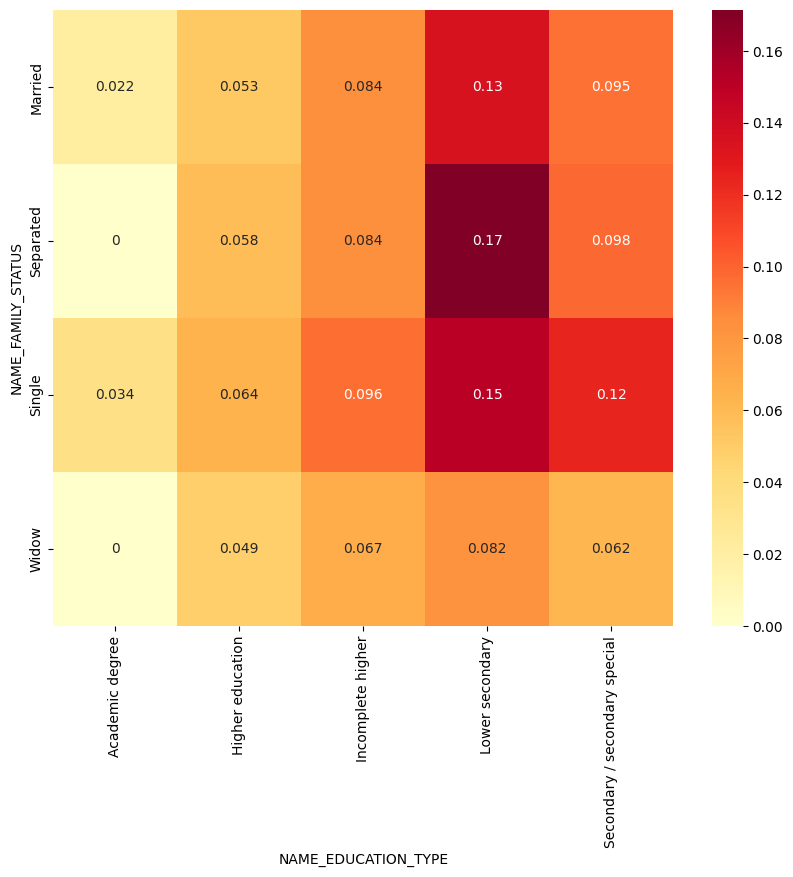

In [179]:
plt.figure(figsize = (10,8))
sns.heatmap(NNT,annot = True,cmap="YlOrRd")
plt.show()

#### NAME_FAMILY_STATUS vs OCCUPATION_TYPE vs TARGET

In [180]:
NOT = pd.pivot_table(data = new_data, index ='NAME_FAMILY_STATUS', columns = 'OCCUPATION_TYPE',values = 'TARGET')
NOT

OCCUPATION_TYPE,Accountants,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,IT staff,Laborers,Low-skill Laborers,Managers,Medicine staff,Others,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
NAME_FAMILY_STATUS,,,,,,,,,,,,,,,,,,,
Married,0.045890,0.097498,0.101614,0.060491,0.106129,0.056511,0.059623,0.072674,0.101176,0.164606,0.059701,0.068469,0.077613,0.062431,0.073308,0.095513,0.079511,0.100572,0.113208
Separated,0.053352,0.078652,0.084135,0.057646,0.145655,0.065217,0.061333,0.000000,0.109598,0.164835,0.068750,0.060514,0.079348,0.105263,0.115385,0.097948,0.000000,0.118834,0.070000
Single,0.058704,0.122066,0.144550,0.080544,0.147677,0.066667,0.072081,0.060000,0.132246,0.204545,0.077574,0.073322,0.096633,0.061896,0.093960,0.101698,0.059633,0.140472,0.131653
Widow,0.044521,0.067265,0.059859,0.038880,0.154545,0.200000,0.048327,0.000000,0.069364,0.041667,0.043290,0.038554,0.053175,0.034483,0.000000,0.077991,0.038462,0.086486,0.047619


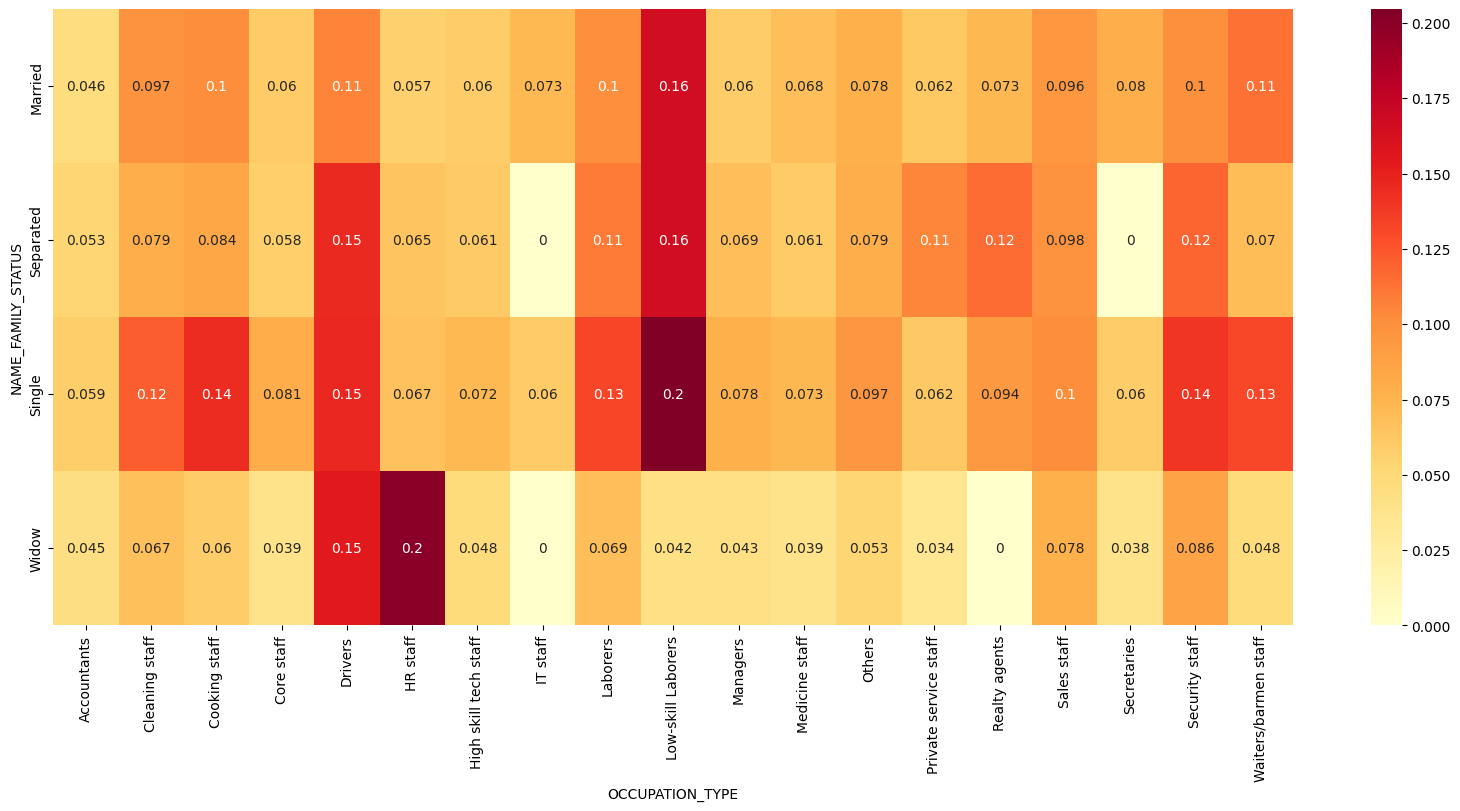

In [181]:
plt.figure(figsize = (20,8))
sns.heatmap(NOT,annot = True,cmap="YlOrRd")
plt.show()

# Correlation between target, and prominent numeric variables

In [182]:
COR = new_data[['TARGET', 'AGE', 'YEARS_EMPLOYED','AMT_INCOME_TOTAL','AMT_CREDIT', 'CNT_FAM_MEMBERS']].corr()
COR

,TARGET,AGE,YEARS_EMPLOYED,AMT_INCOME_TOTAL,AMT_CREDIT,CNT_FAM_MEMBERS
TARGET,1.000000,-0.065778,-0.074742,-0.029958,-0.040660,-0.001881
AGE,-0.065778,1.000000,0.351538,0.050526,0.157275,-0.171778
YEARS_EMPLOYED,-0.074742,0.351538,1.000000,0.032025,0.091123,-0.028848
AMT_INCOME_TOTAL,-0.029958,0.050526,0.032025,1.000000,0.326861,-0.003765
AMT_CREDIT,-0.040660,0.157275,0.091123,0.326861,1.000000,0.037401
CNT_FAM_MEMBERS,-0.001881,-0.171778,-0.028848,-0.003765,0.037401,1.000000


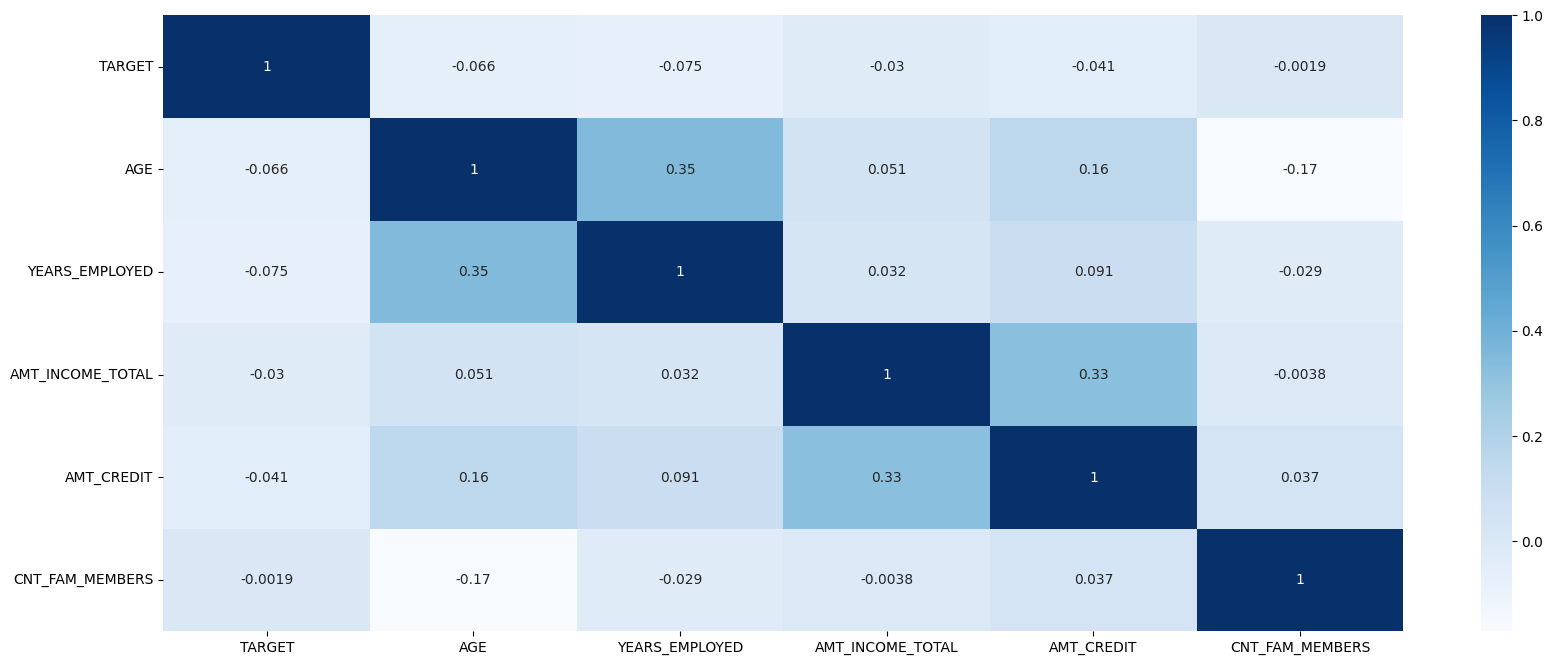

In [183]:
plt.figure(figsize = (20,8))
sns.heatmap(COR,annot = True,cmap="Blues")
plt.show()